# Exploratory analysis of feature selection
*   Completeness analysis
*   Variance
*   Linear correlation filtering
*   Non-linear correlation filtering
*   PCA based filtering
*   Flooring and capping treatment
*   Vote matrix feature selection

Prepared by paulinapglz99 and DanaeAlejandra14:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/dreamAD"

final_merged_data.csv


In [ ]:
#Read file
file_path = '/content/drive/My Drive/dreamAD/final_merged_data.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head(10)

Donor ID  Age at Death  Years of education        PMI  APOE Genotype  \
0  H20-33-034          85.0                16.0  10.016667            0.0   
1  H21-33-035          97.0                14.0   4.800000            2.0   
2  H20-33-014          82.0                16.0   7.400000            2.0   
3  H21-33-015          98.0                12.0   4.100000            2.0   
4  H20-33-033          68.0                18.0   6.500000            2.0   
5  H21-33-043          95.0                16.0   4.400000            2.0   
6  H21-33-005          95.0                16.0  10.200000            2.0   
7  H20-33-031          87.0                12.0   7.916667            2.0   
8  H21-33-036          93.0                14.0   4.000000            2.0   
9  H21-33-002          70.0                18.0   3.200000            4.0   

   Thal  Braak  CERAD  ADNC  percent 6e10 positive area  ...  118_Lamp5_MTG  \
0   3.0    4.0    0.0   2.0                    0.233687  ...       0.029689   
1   5.0    5.0    2.0   3.0                    1.736207  ...       0.135361   
2   3.0    4.0    1.0   2.0                    1.383656  ...       0.052373   
3   2.0    4.0    1.0   1.0                    0.242039  ...       0.147891   
4   5.0    6.0    3.0   3.0                    6.495167  ...       0.115420   
5   4.0    2.0    1.0   1.0                    1.577091  ...       0.131109   
6   3.0    5.0    2.0   2.0                    0.789628  ...       0.126316   
7   4.0    6.0    3.0   3.0                    3.162985  ...       0.139332   
8   4.0    5.0    3.0   3.0                    3.048090  ...       0.148080   
9   5.0    6.0    3.0   3.0                    3.362637  ...       0.129549   

   119_Lamp5_MTG  120_Lamp5_MTG  121_Lamp5_MTG  122_Lamp5_MTG  123_Lamp5_MTG  \
0       0.161838       0.175546       0.251762      -0.044723       0.158981   
1      -0.091992       0.135516       0.463252      -0.100847       0.288095   
2      -0.307499       0.123839      -0.028712       0.389035       0.942567   
3      -0.111411       0.149741       0.488438      -0.077304       0.364934   
4       0.052125       0.023236       0.120584      -0.197487       0.025780   
5      -0.087222       0.149478       0.483910      -0.071543       0.339153   
6      -0.086869       0.148722       0.488263      -0.078691       0.335643   
7      -0.005457       0.021958       0.206852      -0.197567       0.065326   
8      -0.104474       0.143842       0.486909      -0.088581       0.340838   
9      -0.085039       0.148577       0.480048      -0.076079       0.340855   

   124_Lamp5_MTG  125_Lamp5_MTG  126_Lamp5_MTG  127_Lamp5_MTG  
0      -0.273649      -0.057044       0.029562       0.113846  
1      -0.322100      -0.077640       0.231139       0.271844  
2       0.143539       0.145281       0.357426       0.686444  
3      -0.335978      -0.048721       0.266424       0.314548  
4      -0.082098      -0.086830      -0.035383       0.232218  
5      -0.343329      -0.076139       0.253402       0.288106  
6      -0.344008      -0.080572       0.255666       0.278963  
7      -0.127766      -0.084739       0.019891       0.244224  
8      -0.332394      -0.060739       0.251850       0.295774  
9      -0.342209      -0.075710       0.249211       0.287204  

[10 rows x 7099 columns]

1. # Completeness analysis

In [ ]:
#Check missing values
missing_count = data.isna().sum()
print(len(missing_count[missing_count > 0]))

0


In [ ]:
def completeness_filter(df: pd.DataFrame, min_completeness_pct: float = 40.0):

    #Numeric and non-numeric columnsvariation_of_information_score
    numerics = df.select_dtypes(include=np.number).columns.tolist()
    no_numerics = df.select_dtypes(exclude=np.number).columns.tolist()
    #Completeness analysis
    completeness = df[numerics].apply(lambda col: (col != 0).sum() / len(col) * 100)

    #Create the completeness percent table
    pct_completeness = completeness.reset_index()
    pct_completeness.columns = ['Variable', 'completeness_Pct']
    pct_completeness = pct_completeness.sort_values(by='completeness_Pct', ascending=True)

    #Vars that passed the filter
    numeric_filtered = completeness[completeness >= min_completeness_pct].index.tolist()
    #Combine non-numeric columns (which are always saved) with numeric columns that passed
    final_cols = no_numerics + numeric_filtered

    #Final filter
    df_filtered = df[final_cols]

    return df_filtered, numeric_filtered, pct_completeness

In [ ]:
completeness_filtered, completeness_vars, completeness_pct = completeness_filter(data, 80.0)

In [ ]:
completeness_filtered.head(10)

Donor ID  Age at Death  Years of education        PMI  APOE Genotype  \
0  H20-33-034          85.0                16.0  10.016667            0.0   
1  H21-33-035          97.0                14.0   4.800000            2.0   
2  H20-33-014          82.0                16.0   7.400000            2.0   
3  H21-33-015          98.0                12.0   4.100000            2.0   
4  H20-33-033          68.0                18.0   6.500000            2.0   
5  H21-33-043          95.0                16.0   4.400000            2.0   
6  H21-33-005          95.0                16.0  10.200000            2.0   
7  H20-33-031          87.0                12.0   7.916667            2.0   
8  H21-33-036          93.0                14.0   4.000000            2.0   
9  H21-33-002          70.0                18.0   3.200000            4.0   

   Thal  Braak  CERAD  ADNC  percent 6e10 positive area  ...  118_Lamp5_MTG  \
0   3.0    4.0    0.0   2.0                    0.233687  ...       0.029689   
1   5.0    5.0    2.0   3.0                    1.736207  ...       0.135361   
2   3.0    4.0    1.0   2.0                    1.383656  ...       0.052373   
3   2.0    4.0    1.0   1.0                    0.242039  ...       0.147891   
4   5.0    6.0    3.0   3.0                    6.495167  ...       0.115420   
5   4.0    2.0    1.0   1.0                    1.577091  ...       0.131109   
6   3.0    5.0    2.0   2.0                    0.789628  ...       0.126316   
7   4.0    6.0    3.0   3.0                    3.162985  ...       0.139332   
8   4.0    5.0    3.0   3.0                    3.048090  ...       0.148080   
9   5.0    6.0    3.0   3.0                    3.362637  ...       0.129549   

   119_Lamp5_MTG  120_Lamp5_MTG  121_Lamp5_MTG  122_Lamp5_MTG  123_Lamp5_MTG  \
0       0.161838       0.175546       0.251762      -0.044723       0.158981   
1      -0.091992       0.135516       0.463252      -0.100847       0.288095   
2      -0.307499       0.123839      -0.028712       0.389035       0.942567   
3      -0.111411       0.149741       0.488438      -0.077304       0.364934   
4       0.052125       0.023236       0.120584      -0.197487       0.025780   
5      -0.087222       0.149478       0.483910      -0.071543       0.339153   
6      -0.086869       0.148722       0.488263      -0.078691       0.335643   
7      -0.005457       0.021958       0.206852      -0.197567       0.065326   
8      -0.104474       0.143842       0.486909      -0.088581       0.340838   
9      -0.085039       0.148577       0.480048      -0.076079       0.340855   

   124_Lamp5_MTG  125_Lamp5_MTG  126_Lamp5_MTG  127_Lamp5_MTG  
0      -0.273649      -0.057044       0.029562       0.113846  
1      -0.322100      -0.077640       0.231139       0.271844  
2       0.143539       0.145281       0.357426       0.686444  
3      -0.335978      -0.048721       0.266424       0.314548  
4      -0.082098      -0.086830      -0.035383       0.232218  
5      -0.343329      -0.076139       0.253402       0.288106  
6      -0.344008      -0.080572       0.255666       0.278963  
7      -0.127766      -0.084739       0.019891       0.244224  
8      -0.332394      -0.060739       0.251850       0.295774  
9      -0.342209      -0.075710       0.249211       0.287204  

[10 rows x 6447 columns]

In [ ]:
len(completeness_vars)

6446

In [ ]:
completeness_pct.head(10)

Variable  completeness_Pct
222       clustering_global_L4-IT_MTG               0.0
706    largest_community_size_Pax6_A9               0.0
240  clustering_local_mean_L5-6-NP_A9               0.0
241      clustering_global_L5-6-NP_A9               0.0
688                   n_nodes_Pax6_A9               0.0
689                   n_edges_Pax6_A9               0.0
716        clustering_global_Pax6_MTG               0.0
722             Q_modularity_Pax6_MTG               0.0
221   clustering_local_mean_L4-IT_MTG               0.0
705             n_communities_Pax6_A9               0.0

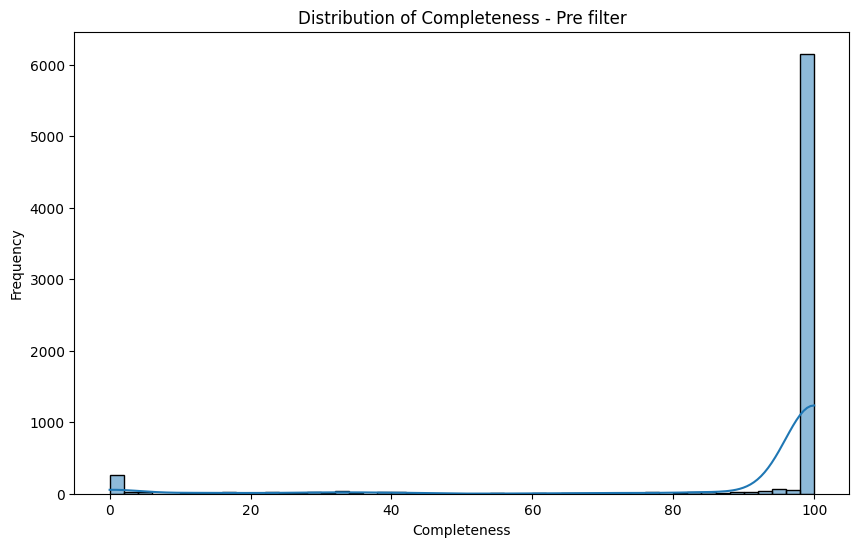

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(completeness_pct['completeness_Pct'], bins=50, kde=True)
plt.title('Distribution of Completeness - Pre filter')
plt.xlabel('Completeness')
plt.ylabel('Frequency')
plt.show()

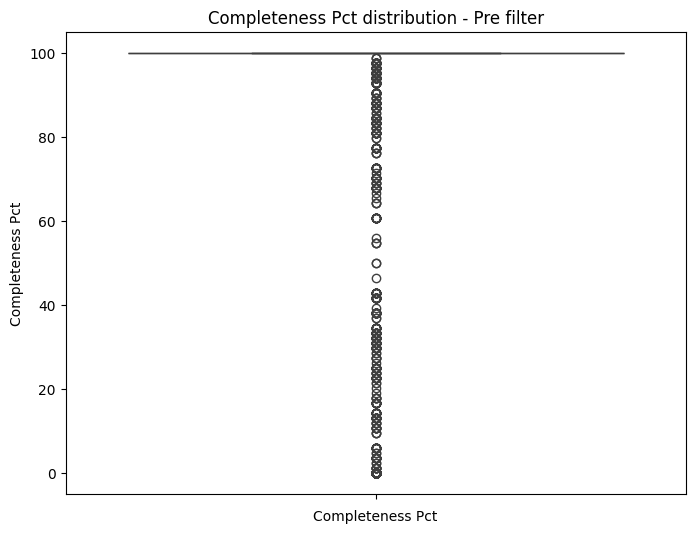

In [ ]:
#Baxplat
plt.figure(figsize=(8, 6))
sns.boxplot(y=completeness_pct['completeness_Pct'])
plt.title('Completeness Pct distribution - Pre filter')
plt.xlabel('Completeness Pct')
plt.ylabel('Completeness Pct')
plt.savefig('boxplot_completeness.png')

In [ ]:
_, _, post_completeness_pct = completeness_filter(completeness_filtered)

In [ ]:
post_completeness_pct.head(10)

Variable  completeness_Pct
179            n_components_Lamp5_MTG         80.952381
178    frac_giant_component_Lamp5_MTG         80.952381
6                               CERAD         80.952381
180                deg_mean_Lamp5_MTG         80.952381
184  largest_community_size_Lamp5_MTG         80.952381
181              deg_median_Lamp5_MTG         80.952381
182               kcore_max_Lamp5_MTG         80.952381
183           n_communities_Lamp5_MTG         80.952381
175                diameter_Lamp5_MTG         80.952381
174            avg_path_len_Lamp5_MTG         80.952381

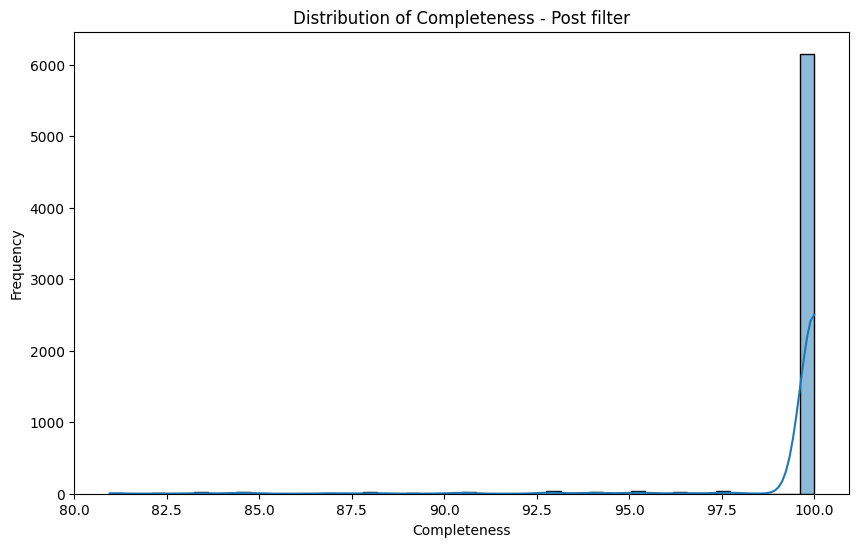

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(post_completeness_pct['completeness_Pct'], bins=50, kde=True)
plt.title('Distribution of Completeness - Post filter')
plt.xlabel('Completeness')
plt.ylabel('Frequency')
plt.show()

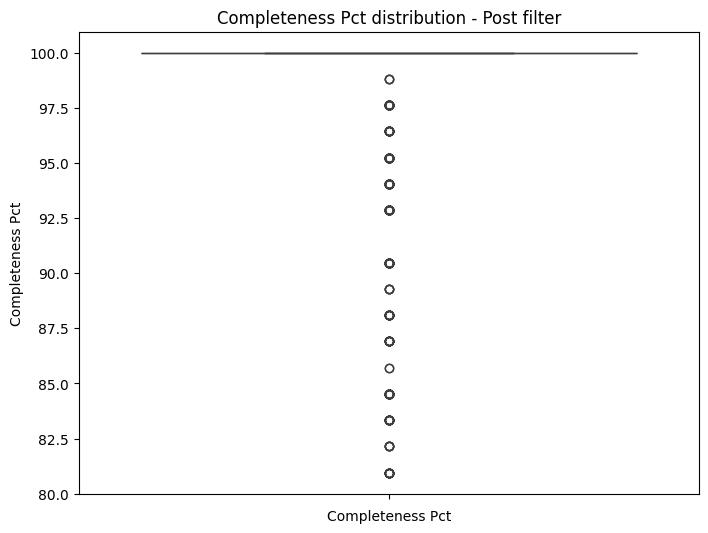

In [ ]:
#Baxplat
plt.figure(figsize=(8, 6))
sns.boxplot(y=post_completeness_pct['completeness_Pct'])
plt.title('Completeness Pct distribution - Post filter')
plt.xlabel('Completeness Pct')
plt.ylabel('Completeness Pct')
plt.savefig('boxplot_completeness.png')

## The variants here selected are in:

In [ ]:
completeness_vars

['Age at Death',
 'Years of education',
 'PMI',
 'APOE Genotype',
 'Thal',
 'Braak',
 'CERAD',
 'ADNC',
 'percent 6e10 positive area',
 'percent AT8 positive area',
 'percent NeuN positive area',
 'percent GFAP positive area',
 'Race_1',
 'Race_2',
 'Race_3',
 'Race_5',
 'Race_7',
 'Race_8',
 'Race_9',
 'Race_11',
 'n_nodes_Astrocyte_A9',
 'n_edges_Astrocyte_A9',
 'avg_path_len_Astrocyte_A9',
 'diameter_Astrocyte_A9',
 'global_density_Astrocyte_A9',
 'size_giant_component_Astrocyte_A9',
 'frac_giant_component_Astrocyte_A9',
 'n_components_Astrocyte_A9',
 'assortativity_Astrocyte_A9',
 'deg_mean_Astrocyte_A9',
 'deg_median_Astrocyte_A9',
 'deg_sd_Astrocyte_A9',
 'kcore_max_Astrocyte_A9',
 'Q_modularity_Astrocyte_A9',
 'perc_targeted_50_Astrocyte_A9',
 'n_communities_Astrocyte_A9',
 'largest_community_size_Astrocyte_A9',
 'n_nodes_L2-3-IT_A9',
 'n_edges_L2-3-IT_A9',
 'avg_path_len_L2-3-IT_A9',
 'diameter_L2-3-IT_A9',
 'global_density_L2-3-IT_A9',
 'size_giant_component_L2-3-IT_A9',
 'fra

# 2. Variance

In [ ]:
def fs_varianced(df, quartile=4, return_variance_table=False):
    """
    Filtra columnas de un DataFrame según su varianza y, opcionalmente,
    devuelve la tabla de varianzas.

    Args:
    -----------
    df (pd.DataFrame): DataFrame de entrada.
    quartile (int): Cuartil a conservar (1, 2, 3, o 4).
    keep_non_numeric (bool): Si es True, conserva las columnas no numéricas.
    return_variance_table (bool): Si es True, devuelve también la tabla de varianzas.

    Returns:
    --------
    pd.DataFrame or tuple:
        - Si return_variance_table es False (default), devuelve solo el DataFrame filtrado.
        - Si es True, devuelve una tupla: (DataFrame_filtrado, DataFrame_de_varianzas).
    """
    if isinstance(df, dict):
        df = pd.DataFrame(df)

    #Calculate the variance of all numeric columns.
    numeric_cols = df.select_dtypes(include=["number"])
    variance_table = numeric_cols.var().to_frame("Variance").sort_values("Variance", ascending=False)

    #Calculate the quartile limits
    quantiles = np.quantile(variance_table["Variance"], [0, 0.25, 0.5, 0.75, 1.0])
    bounds = {
        1: (quantiles[0], quantiles[1]),
        2: (quantiles[1], quantiles[2]),
        3: (quantiles[2], quantiles[3]),
        4: (quantiles[3], quantiles[4])
    }

    #Select vars within the quartile specified
    low, high = bounds[quartile]
    variance_vars = variance_table[
        (variance_table["Variance"] >= low) & (variance_table["Variance"] <= high)
    ].index.tolist()

    #Filter data
    non_numeric_cols = df.select_dtypes(exclude=["number"]).columns.tolist()
    variance_vars = non_numeric_cols + variance_vars
    filtered_df = df[variance_vars]

    #If you need the variance table
    if return_variance_table:
        return filtered_df, variance_table, variance_vars, non_numeric_cols
    else:
        return filtered_df, variance_vars

In [ ]:
variance_filter, variance_data, variance_vars = fs_varianced(data, quartile=3, return_variance_table=True)

In [ ]:
non_numeric_cols

['Donor ID']

In [ ]:
variance_filter.head(10)

Donor ID  4_Sst_A9  32_L6-CT_A9  46_Oligodendrocyte_A9  107_L2-3-IT_A9  \
0  H20-33-034 -0.214357     0.154588              -0.376145       -0.568315   
1  H21-33-035 -0.674085     0.249331              -0.675951       -0.583855   
2  H20-33-014 -0.870037     0.146164              -0.253442       -0.420892   
3  H21-33-015 -0.629151     0.280975              -0.672948       -0.614739   
4  H20-33-033 -0.193419     0.029182              -0.313316        0.199206   
5  H21-33-043 -0.639367     0.274661              -0.681372       -0.611235   
6  H21-33-005 -0.639695     0.274415              -0.675577       -0.487877   
7  H20-33-031 -0.401496    -0.369065              -0.396656       -0.225246   
8  H21-33-036 -0.627862     0.275338              -0.673015       -0.524661   
9  H21-33-002 -0.645870     0.272416              -0.689786       -0.583527   

   120_L5-IT_MTG  21_L6-IT_MTG  102_L4-IT_MTG  91_Oligodendrocyte_MTG  \
0      -0.320554      0.488431       0.027838               -0.161690   
1       0.197997     -0.192516       0.448993               -0.541555   
2       0.075997      0.579823       0.251080               -0.044463   
3       0.179967     -0.163466       0.448450               -0.528808   
4       0.207330     -0.079737       0.532894               -0.538446   
5       0.170006     -0.166037       0.452691               -0.526649   
6       0.210892     -0.168694       0.455290               -0.550881   
7      -0.223911     -0.075634       0.396807               -0.329216   
8       0.199607     -0.163220       0.453597               -0.548591   
9       0.156267     -0.163576       0.453461               -0.516933   

   27_L5-IT_MTG  ...  77_L5-ET_A9  77_Endothelial_A9  77_Pax6_MTG  \
0      0.082198  ...    -0.331716          -0.303661    -0.305186   
1     -0.495461  ...    -0.252510          -0.252510    -0.252510   
2     -0.502546  ...    -0.287868          -0.290001    -0.304482   
3     -0.472534  ...    -0.075811          -0.075811    -0.075811   
4     -0.483711  ...    -0.326319          -0.304817    -0.300643   
5     -0.472035  ...    -0.440735          -0.211197    -0.440735   
6     -0.513369  ...    -0.429304          -0.302819    -0.429304   
7      0.258790  ...    -0.433972          -0.326678    -0.397556   
8     -0.500641  ...    -0.166089          -0.166089    -0.166089   
9     -0.459802  ...    -0.453564          -0.453564    -0.453564   

   77_Sst-Chodl_MTG  77_Sst-Chodl_A9  77_Pax6_A9  77_VLMC_A9  37_L6b_MTG  \
0         -0.303661        -0.290001   -0.311495   -0.290001    0.094291   
1         -0.306103        -0.252510   -0.252510   -0.252510    0.011959   
2         -0.304482        -0.433972   -0.304817   -0.363144    0.090475   
3         -0.174731        -0.597141   -0.357664   -0.059521    0.024518   
4         -0.062847        -0.326678   -0.298900   -0.326678    0.096941   
5         -0.059521        -0.453564   -0.228967   -0.440735    0.040542   
6         -0.444702        -0.228967   -0.304646   -0.429304    0.029613   
7         -0.290001        -0.359042   -0.359042   -0.287868    0.111251   
8         -0.087922        -0.059521   -0.043626   -0.444702    0.025004   
9         -0.100471        -0.444702   -0.440735   -0.211197    0.026867   

   perc_targeted_50_Pvalb_A9  10_L6-IT-Car3_MTG  
0                       0.20          -0.134066  
1                       0.20          -0.001594  
2                       0.28          -0.022146  
3                       0.24           0.007216  
4                       0.20          -0.053516  
5                       0.20           0.009258  
6                       0.30           0.017456  
7                       0.20           0.007206  
8                       0.20          -0.002197  
9                       0.40           0.013210  

[10 rows x 1775 columns]

In [ ]:
variance_data.head(10)

Variance
n_edges_L5-IT_MTG    6.895924e+09
n_edges_L2-3-IT_A9   6.305776e+09
n_edges_L2-3-IT_MTG  5.859007e+09
n_edges_L5-IT_A9     5.731587e+09
n_edges_Pvalb_MTG    3.492076e+09
n_edges_L4-IT_A9     3.342557e+09
n_edges_Pvalb_A9     3.254402e+09
n_edges_Vip_MTG      2.881807e+09
n_edges_L6-IT_A9     2.722178e+09
n_edges_L4-IT_MTG    2.707036e+09

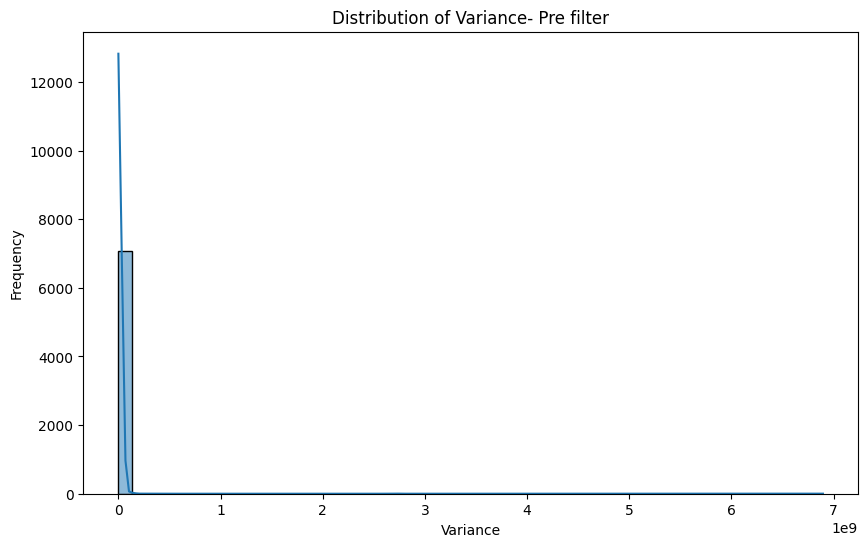

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(variance_data['Variance'], bins=50, kde=True)
plt.title('Distribution of Variance- Pre filter')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

In [ ]:
len(variance_vars)

1775

In [ ]:
_,variance_data_post,_ = varianced(variance_filter, quartile=1, return_variance_table=True)

In [ ]:
variance_data_post

Variance
4_Sst_A9                   0.042098
32_L6-CT_A9                0.042057
46_Oligodendrocyte_A9      0.042055
107_L2-3-IT_A9             0.042055
120_L5-IT_MTG              0.042045
...                             ...
77_Pax6_A9                 0.010338
77_VLMC_A9                 0.010338
37_L6b_MTG                 0.010335
perc_targeted_50_Pvalb_A9  0.010334
10_L6-IT-Car3_MTG          0.010310

[1774 rows x 1 columns]

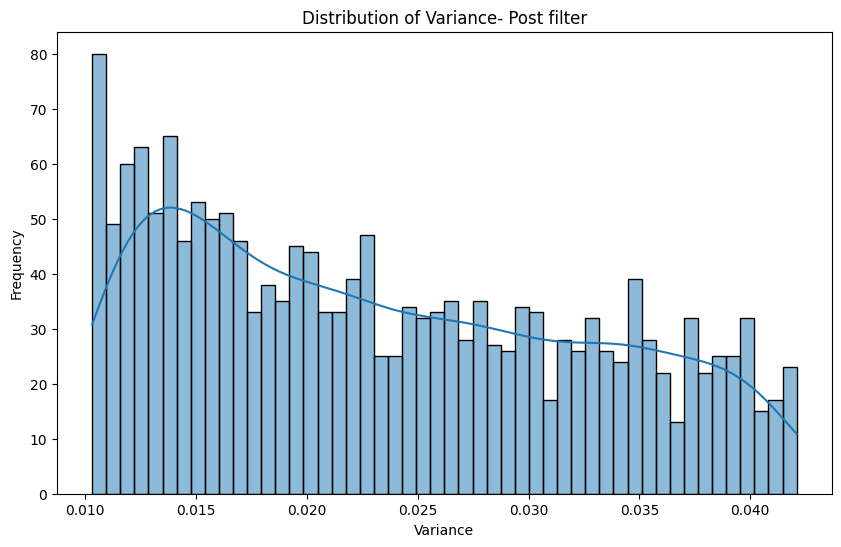

In [ ]:
#Plot post variance filter distribution

plt.figure(figsize=(10, 6))
sns.histplot(variance_data_post['Variance'], bins=50, kde=True)
plt.title('Distribution of Variance- Post filter')
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.show()

## The variants here selected are in


In [ ]:
variance_vars[0:10]

['Donor ID',
 '4_Sst_A9',
 '32_L6-CT_A9',
 '46_Oligodendrocyte_A9',
 '107_L2-3-IT_A9',
 '120_L5-IT_MTG',
 '21_L6-IT_MTG',
 '102_L4-IT_MTG',
 '91_Oligodendrocyte_MTG',
 '27_L5-IT_MTG',
 '48_Pvalb_A9',
 '76_Pvalb_MTG',
 '39_L2-3-IT_MTG',
 '127_Pvalb_MTG',
 '125_L5-IT_A9',
 '57_Lamp5_MTG',
 '11_L6-IT_A9',
 '16_Astrocyte_A9',
 'assortativity_L6-IT_MTG',
 '110_Pvalb_A9',
 '20_L6-CT_A9',
 '1_Lamp5_MTG',
 '123_Vip_A9',
 '121_Oligodendrocyte_MTG',
 '29_L2-3-IT_MTG',
 '45_Oligodendrocyte_MTG',
 '42_L2-3-IT_MTG',
 '108_L6-IT-Car3_MTG',
 '116_L4-IT_MTG',
 '23_Oligodendrocyte_A9',
 '121_Sst_MTG',
 '32_Sst_MTG',
 '64_Vip_A9',
 '44_Astrocyte_MTG',
 '71_L6b_A9',
 '2_Microglia-PVM_A9',
 '99_Astrocyte_A9',
 '66_L6-IT_MTG',
 '53_Vip_A9',
 'Q_modularity_Vip_A9',
 '41_Sst_MTG',
 '31_Sst_MTG',
 '55_Oligodendrocyte_MTG',
 '84_Lamp5_A9',
 '100_L5-IT_A9',
 '51_Pvalb_MTG',
 'global_density_Chandelier_A9',
 '77_L2-3-IT_A9',
 '109_Lamp5_A9',
 '12_L5-IT_MTG',
 '6_L2-3-IT_MTG',
 '8_Sst_A9',
 '42_Pvalb_MTG',
 '79_S

### 3. Outliers (Flooring and caping)

In [ ]:
data_simple = data.columns[:100].tolist()
data_simple = data[data_simple]
data_simple.head(10)

Donor ID  Age at Death  Years of education        PMI  APOE Genotype  \
0  H20-33-034          85.0                16.0  10.016667            0.0   
1  H21-33-035          97.0                14.0   4.800000            2.0   
2  H20-33-014          82.0                16.0   7.400000            2.0   
3  H21-33-015          98.0                12.0   4.100000            2.0   
4  H20-33-033          68.0                18.0   6.500000            2.0   
5  H21-33-043          95.0                16.0   4.400000            2.0   
6  H21-33-005          95.0                16.0  10.200000            2.0   
7  H20-33-031          87.0                12.0   7.916667            2.0   
8  H21-33-036          93.0                14.0   4.000000            2.0   
9  H21-33-002          70.0                18.0   3.200000            4.0   

   Thal  Braak  CERAD  ADNC  percent 6e10 positive area  ...  \
0   3.0    4.0    0.0   2.0                    0.233687  ...   
1   5.0    5.0    2.0   3.0                    1.736207  ...   
2   3.0    4.0    1.0   2.0                    1.383656  ...   
3   2.0    4.0    1.0   1.0                    0.242039  ...   
4   5.0    6.0    3.0   3.0                    6.495167  ...   
5   4.0    2.0    1.0   1.0                    1.577091  ...   
6   3.0    5.0    2.0   2.0                    0.789628  ...   
7   4.0    6.0    3.0   3.0                    3.162985  ...   
8   4.0    5.0    3.0   3.0                    3.048090  ...   
9   5.0    6.0    3.0   3.0                    3.362637  ...   

   clustering_global_Chandelier_A9  assortativity_Chandelier_A9  \
0                              0.0                         -0.5   
1                              0.0                         -1.0   
2                              0.0                          0.0   
3                              0.0                          0.0   
4                              0.0                          0.0   
5                              0.0                          0.0   
6                              0.0                          0.0   
7                              0.0                          0.0   
8                              0.0                          0.0   
9                              0.0                          0.0   

   deg_mean_Chandelier_A9  deg_median_Chandelier_A9  deg_sd_Chandelier_A9  \
0                1.500000                       1.5               0.57735   
1                1.333333                       1.0               0.57735   
2                0.000000                       0.0               0.00000   
3                0.000000                       0.0               0.00000   
4                0.000000                       0.0               0.00000   
5                0.000000                       0.0               0.00000   
6                0.000000                       0.0               0.00000   
7                0.000000                       0.0               0.00000   
8                0.000000                       0.0               0.00000   
9                0.000000                       0.0               0.00000   

   kcore_max_Chandelier_A9  Q_modularity_Chandelier_A9  \
0                      1.0                         0.0   
1                      1.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
5                      0.0                         0.0   
6                      0.0                         0.0   
7                      0.0                         0.0   
8                      0.0                         0.0   
9                      0.0                         0.0   

   perc_targeted_50_Chandelier_A9  n_communities_Chandelier_A9  \
0                            0.50                          1.0   
1                            0.34                          1.0   
2                            

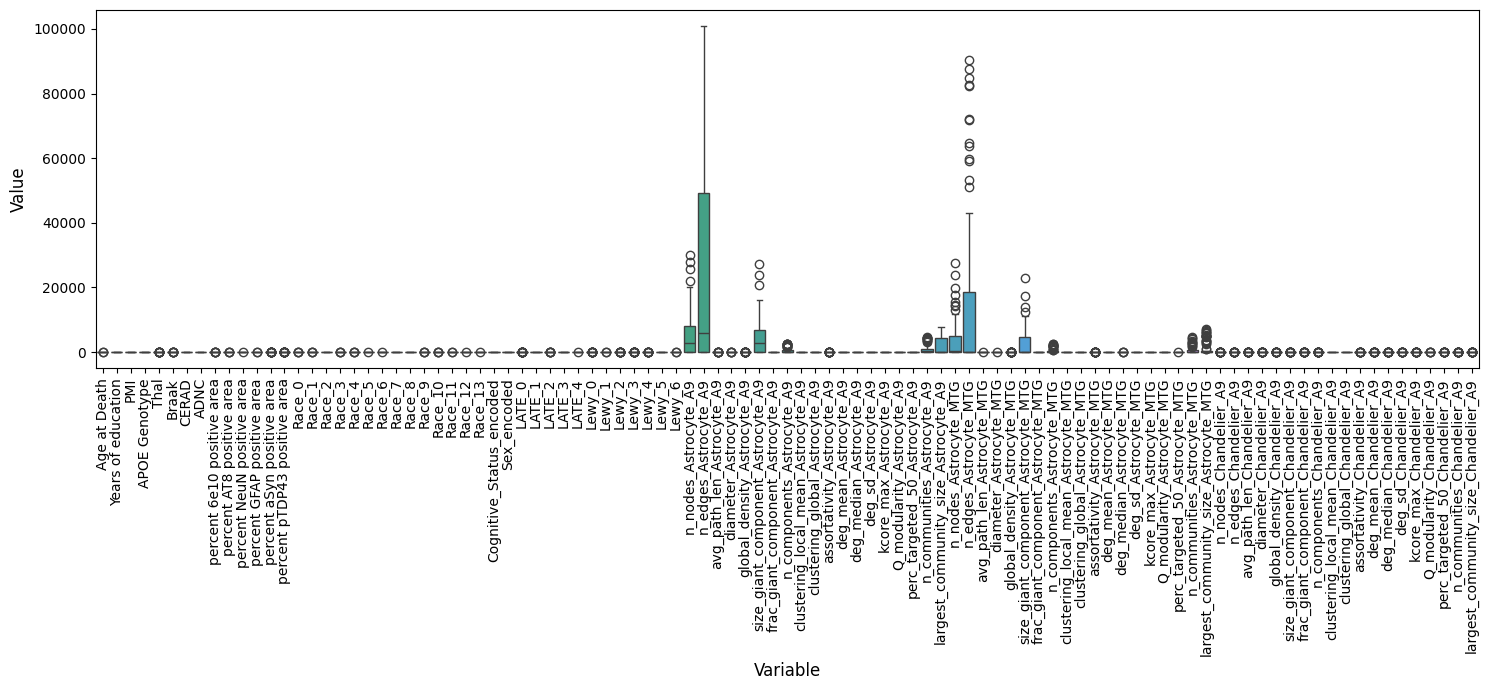

In [ ]:
#Vars boxplot pre-filter
plt.figure(figsize=(15, 7))
sns.boxplot(data=data_simple)
#plt.title('Boxplots of 100 Variables', fontsize=16)
plt.xlabel('Variable', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
def flooring_capping(df: pd.DataFrame,
                                 lower_quantile: float = 0.05,
                                 upper_quantile: float = 0.95) -> pd.DataFrame:
    """
    Applies flooring and capping to all numeric columns in a DataFrame using the quantiles method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        lower_quantile (float): The lower quantile to define the floor.
        upper_quantile (float): The upper quantile to define the ceiling.

    Returns:
        pd.DataFrame: A new DataFrame with the outliers handled.
    """

    #Select only the numeric columns and create a copy to avoid SettingWithCopyWarning
    numeric_cols = df.select_dtypes(include=np.number).columns
    df_copy = df.copy()

    for col in numeric_cols:
        #Calculate the lower and upper limits using the specified quantiles.
        lower_limit = df_copy[col].quantile(lower_quantile)
        upper_limit = df_copy[col].quantile(upper_quantile)

        #Apply flooring y capping
        df_copy[col] = df_copy[col].clip(lower=lower_limit, upper=upper_limit)

    return df_copy

In [ ]:
floo_filter = flooring_capping(df=data, lower_quantile = 0.05,
                                 upper_quantile = 0.95)

In [ ]:
floo_filter.head(10)

Donor ID  Age at Death  Years of education        PMI  APOE Genotype  \
0  H20-33-034         85.00                16.0  10.016667            1.0   
1  H21-33-035         97.00                14.0   4.800000            2.0   
2  H20-33-014         82.00                16.0   7.400000            2.0   
3  H21-33-015         98.00                12.0   4.100000            2.0   
4  H20-33-033         72.45                18.0   6.500000            2.0   
5  H21-33-043         95.00                16.0   4.400000            2.0   
6  H21-33-005         95.00                16.0  10.200000            2.0   
7  H20-33-031         87.00                12.0   7.916667            2.0   
8  H21-33-036         93.00                14.0   4.000000            2.0   
9  H21-33-002         72.45                18.0   3.660000            4.0   

   Thal  Braak  CERAD  ADNC  percent 6e10 positive area  ...  118_Lamp5_MTG  \
0   3.0    4.0    0.0   2.0                    0.233687  ...       0.029689   
1   5.0    5.0    2.0   3.0                    1.736207  ...       0.135361   
2   3.0    4.0    1.0   2.0                    1.383656  ...       0.052373   
3   2.0    4.0    1.0   1.0                    0.242039  ...       0.147891   
4   5.0    6.0    3.0   3.0                    6.495167  ...       0.115420   
5   4.0    2.0    1.0   1.0                    1.577091  ...       0.131109   
6   3.0    5.0    2.0   2.0                    0.789628  ...       0.126316   
7   4.0    6.0    3.0   3.0                    3.162985  ...       0.139332   
8   4.0    5.0    3.0   3.0                    3.048090  ...       0.148080   
9   5.0    6.0    3.0   3.0                    3.362637  ...       0.129549   

   119_Lamp5_MTG  120_Lamp5_MTG  121_Lamp5_MTG  122_Lamp5_MTG  123_Lamp5_MTG  \
0       0.094842       0.175546       0.251762      -0.044723       0.158981   
1      -0.091992       0.135516       0.463252      -0.100847       0.288095   
2      -0.307499       0.123839       0.036251       0.384980       0.674943   
3      -0.111411       0.149741       0.488438      -0.077304       0.364934   
4       0.052125       0.033192       0.120584      -0.189214       0.031712   
5      -0.087222       0.149478       0.483910      -0.071543       0.339153   
6      -0.086869       0.148722       0.488263      -0.078691       0.335643   
7      -0.005457       0.033192       0.206852      -0.189214       0.065326   
8      -0.104474       0.143842       0.486909      -0.088581       0.340838   
9      -0.085039       0.148577       0.480048      -0.076079       0.340855   

   124_Lamp5_MTG  125_Lamp5_MTG  126_Lamp5_MTG  127_Lamp5_MTG  
0      -0.273649      -0.057044       0.029562       0.113846  
1      -0.322100      -0.077640       0.231139       0.271844  
2      -0.062684       0.145281       0.357426       0.486620  
3      -0.335978      -0.048721       0.266424       0.314548  
4      -0.082098      -0.086830      -0.004337       0.232218  
5      -0.343329      -0.076139       0.253402       0.288106  
6      -0.344008      -0.080572       0.255666       0.278963  
7      -0.127766      -0.084739       0.019891       0.244224  
8      -0.332394      -0.060739       0.251850       0.295774  
9      -0.342209      -0.075710       0.249211       0.287204  

[10 rows x 7099 columns]

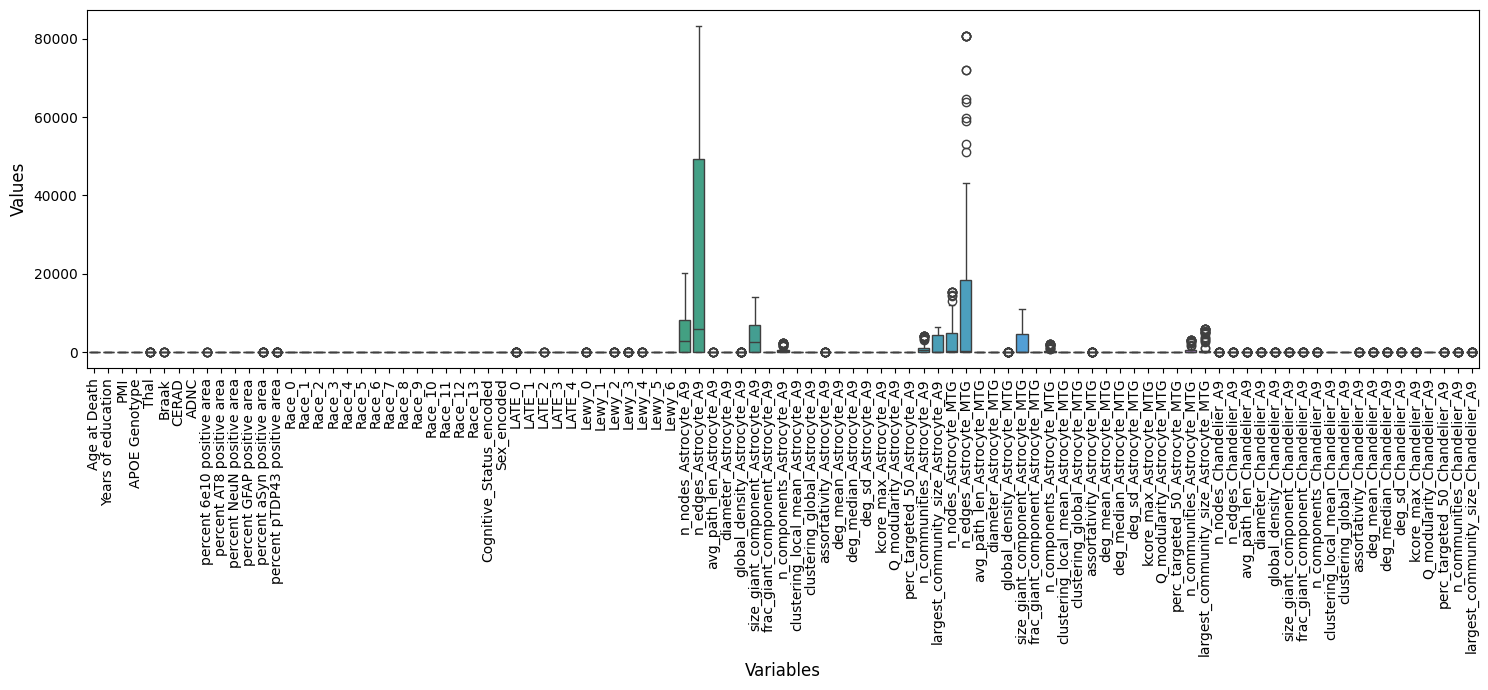

In [ ]:
#Boxplot of variance post flooring-capping
floo_filterpl= floo_filter[floo_filter.columns[:100].tolist()]
plt.figure(figsize=(15, 7))
sns.boxplot(data= floo_filterpl)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#Both tables must have the same dimensions
print(data.shape)
print(floo_filter.shape)

(84, 7099)
(84, 7099)


##  The variables here stay as they are

# 3.Linear correlation between variables.


In [ ]:
def fs_linear_corr(df, zscore_threshold=2.0):
    """
    Variable selection based on Pearson's linear correlation.

    Params
    ------
    df : pd.DataFrame
        Original dataset with numeric and non-numeric variables.
    zscore_threshold : float
        Z-score to define high correlation threshold.

    Returns
    -------
    dict with:
        - df_filtered: DataFrame with final columns (filtered numeric + non-numeric)
        - final_features: list of final selected variables
        - stats: dict with mean, std, thresholds, and deleted variables
- corr_matrix: final squared correlation matrix
- corrs_pre: pre-filtered upper triangle values
- corrs_post: post-filtered upper triangle values
    """

    #Get numric and non numeric vars
    num_df = df.select_dtypes(include=[np.number]).copy()
    non_num_df = df.select_dtypes(exclude=[np.number]).copy()

    #Drop zero variance vars
    variance = num_df.var()
    num_df = num_df.loc[:, variance > 0]

    #Corr matrix
    corr_matrix = num_df.corr(method='pearson').fillna(0)

    #Get correlation distributions
    corrs_pre = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)).stack()
    mean_corr = corrs_pre.mean()
    std_corr = corrs_pre.std()

    #Define thresholds based on z-scores
    upper_threshold = mean_corr + zscore_threshold * std_corr
    lower_threshold = mean_corr - zscore_threshold * std_corr

    #Drop reduntant data
    to_drop = set()
    for col in corr_matrix.columns:
        if col in to_drop:
            continue
        high_corr = corr_matrix.index[(corr_matrix[col].abs() > upper_threshold) & (corr_matrix.index != col)]
        to_drop.update(high_corr)

    final_features = [col for col in num_df.columns if col not in to_drop]

    #Final dataframe
    df_filtered = pd.concat([num_df[final_features], non_num_df], axis=1)

    #Final corr matrix (only with selected features)
    corr_matrix_final = df_filtered[final_features].corr().fillna(0)

    #Final corr distribution
    corrs_post = corr_matrix_final.where(np.triu(np.ones(corr_matrix_final.shape), k=1).astype(bool)).stack()

    stats = {
        "mean_corr": mean_corr,
        "std_corr": std_corr,
        "upper_threshold": upper_threshold,
        "lower_threshold": lower_threshold,
        "zscore_threshold": zscore_threshold,
        "num_removed": len(to_drop)#,
       # "removed_features": list(to_drop)
    }

    return {
        "df_filtered": df_filtered,
        "final_features": final_features,
        "stats": stats,
        "corr_matrix_pre": corr_matrix,
        "corr_matrix_final": corr_matrix_final,
        "corrs_pre": corrs_pre,
        "corrs_post": corrs_post
    }


In [ ]:
linear_filter = fs_linear_corr(data, zscore_threshold=2.0)

In [ ]:
print(linear_filter['stats']["mean_corr"])
print(linear_filter['stats']["upper_threshold"])
print(linear_filter['stats']["lower_threshold"])

0.0006141248951024859
0.4871701675962569
-0.48594191780605195


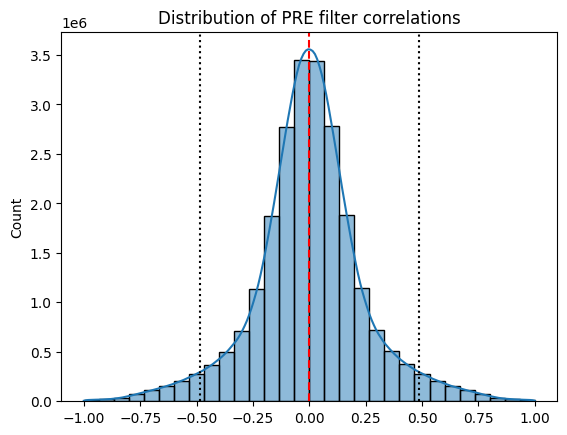

In [ ]:
#Plot Linear correlation Pre-filter distribution
sns.histplot(linear_filter["corrs_pre"], bins=30, kde=True)
plt.axvline(linear_filter["stats"]["mean_corr"], color='red', linestyle='--', label=f'Media ({linear_filter["stats"]["mean_corr"]:.2f})')
plt.axvline(linear_filter['stats']["upper_threshold"], color='black', linestyle=':', label=f'Z-Score threshold ({linear_filter["stats"]['upper_threshold']:.2f})')
plt.axvline(linear_filter['stats']["lower_threshold"], color='black', linestyle=':', label=f'Z-Score threshold ({linear_filter["stats"]['lower_threshold']:.2f})')

plt.title("Distribution of PRE filter correlations")
plt.show()

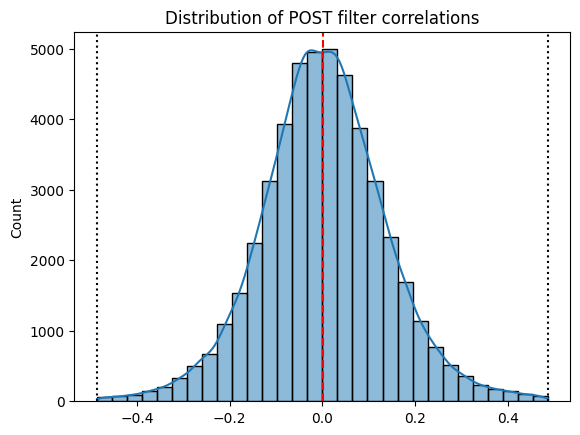

In [ ]:
#Plot Linear correlation Post-filter distribution
sns.histplot(linear_filter["corrs_post"], bins=30, kde=True)
plt.axvline(linear_filter["stats"]["mean_corr"], color='red', linestyle='--', label=f'Media ({linear_filter["stats"]["mean_corr"]:.2f})')
plt.axvline(linear_filter['stats']["upper_threshold"], color='black', linestyle=':', label=f'Z-Score threshold ({linear_filter["stats"]['upper_threshold']:.2f})')
plt.axvline(linear_filter['stats']["lower_threshold"], color='black', linestyle=':', label=f'Z-Score threshold ({linear_filter["stats"]['lower_threshold']:.2f})')

plt.title("Distribution of POST filter correlations")
plt.show()

In [ ]:
def plot_corrmatrix(corr_matrix, figsize=(10,8), cmap="coolwarm", title="Correlation Matrix"):
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr_matrix,
        cmap=cmap,
        annot=False,
        center=0,
        square=True,
        cbar_kws={"shrink": .8}
    )
    plt.title(title, fontsize=14)
    plt.tight_layout()
    plt.show()

                    Age at Death  Years of education       PMI  APOE Genotype  \
Age at Death            1.000000           -0.170467 -0.001818      -0.272928   
Years of education     -0.170467            1.000000  0.036559       0.067796   
PMI                    -0.001818            0.036559  1.000000      -0.137569   
APOE Genotype          -0.272928            0.067796 -0.137569       1.000000   
Thal                   -0.026561            0.028019  0.035146       0.492431   
...                          ...                 ...       ...            ...   
123_Lamp5_MTG           0.030496           -0.070837  0.070214       0.056456   
124_Lamp5_MTG          -0.090638           -0.054008 -0.004497       0.109310   
125_Lamp5_MTG           0.175348           -0.193806  0.022673      -0.144220   
126_Lamp5_MTG           0.122990           -0.042517  0.053865      -0.000012   
127_Lamp5_MTG          -0.097904            0.140644  0.048667       0.173927   

                        Tha

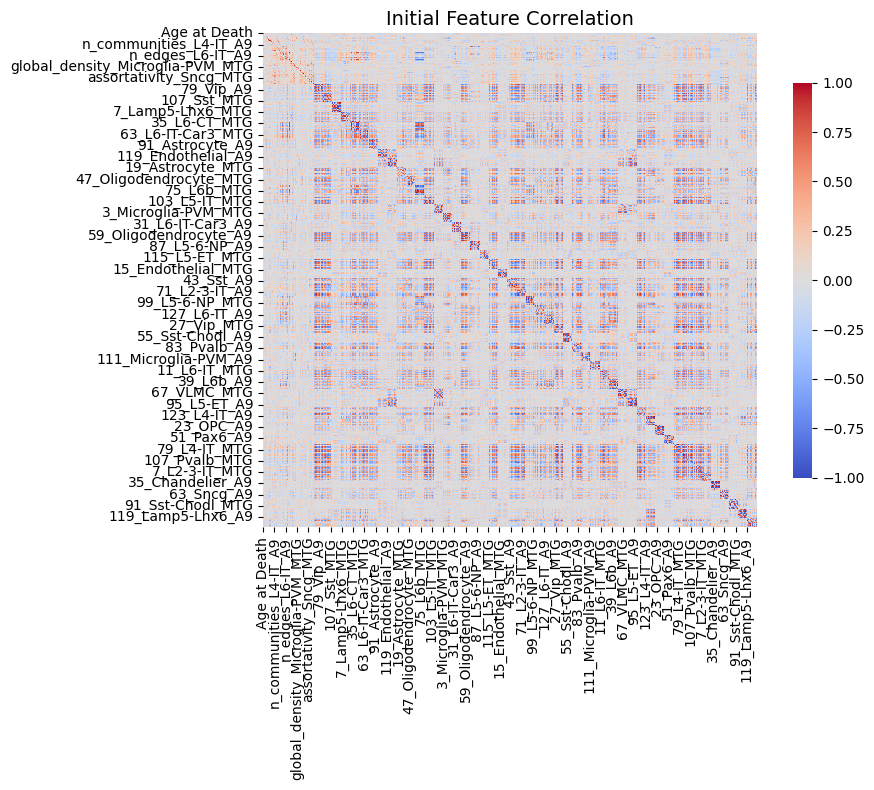

In [ ]:
corr_matrix_pre = linear_filter["corr_matrix_pre"]
plot_corrmatrix(corr_matrix_pre, title="Initial Feature Correlation")

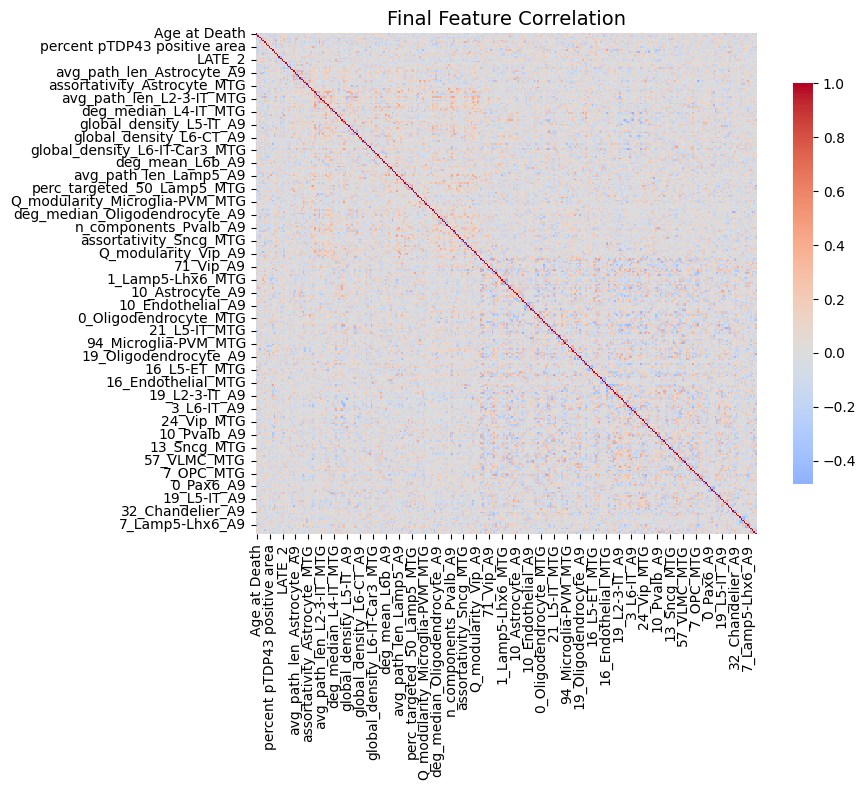

In [ ]:
corr_matrix_post = linear_filter["corr_matrix_final"]
plot_corrmatrix(corr_matrix_post, title="Final Feature Correlation")

## The vars after the linear correlation filter are in :

In [ ]:
linear_filter["final_features"][:15]

['Age at Death',
 'Years of education',
 'PMI',
 'APOE Genotype',
 'Braak',
 'percent NeuN positive area',
 'percent GFAP positive area',
 'percent aSyn positive area',
 'percent pTDP43 positive area',
 'Race_0',
 'Race_5',
 'Race_12',
 'Cognitive_Status_encoded',
 'Sex_encoded',
 'LATE_0']

## 4. Non-Linear correlation between variables (Mutual Information and Variation of Information)

#### Targets are

* Overall AD Neuropathological Change (ADNC)
* Braak
* Thal
* CERAD
* LATE-NC
* Lewy Body Disease Stage
* 6e10
* AT8
* NeuN
* GFAP
* aSyn
* pTDP43

In [ ]:
target_vars = ['ADNC',
 'Braak',
 'Thal',
 'CERAD',
 'LATE_0',
 'LATE_1',
 'LATE_2',
 'LATE_3',
 'LATE_4',
 'Lewy_0',
 'Lewy_1',
 'Lewy_2',
 'Lewy_3',
 'Lewy_4',
 'Lewy_5',
 'Lewy_6',
 'percent 6e10 positive area',
 'percent AT8 positive area',
 'percent NeuN positive area',
 'percent GFAP positive area',
 'percent aSyn positive area',
 'percent pTDP43 positive area',
 ]

In [ ]:
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import entropy

def fs_mi_vi_matrix(df: pd.DataFrame, target_vars: list, n_bins: int = 10, threshold_quantile: float = 0.5):
    """
    Calculate MI and VI, and filter to retain the MOST DIFFERENT variables (highest VI) with respect to the targets, for feature selection.
    """
    #Only numerics first
    numerics = df.select_dtypes(include=np.number)

    #Check missing targets in the data
    missing_targets = set(target_vars) - set(numerics.columns)
    if missing_targets:
        raise ValueError(f"Target variables not found or not numeric: {missing_targets}")

    #Discretize with KBinsDiscretizer (because some distributions are short)
    discretizer = KBinsDiscretizer(n_bins=n_bins, encode="ordinal", strategy="quantile", subsample=None)
    discretized_data = discretizer.fit_transform(numerics)
    df_disc = pd.DataFrame(discretized_data, index=numerics.index, columns=numerics.columns)

    #Initialize matrices
    mi_matrix = pd.DataFrame(0.0, index=target_vars, columns=df_disc.columns)
    vi_matrix = pd.DataFrame(0.0, index=target_vars, columns=df_disc.columns)

    #Calculate MI and VI
    for t in target_vars:
        t_vals = df_disc[t].astype(int)
        for c in df_disc.columns:
            c_vals = df_disc[c].astype(int)
            if t_vals.nunique() <= 1 or c_vals.nunique() <= 1:
                continue

            mi = mutual_info_score(t_vals, c_vals)
            #Check entropy
            h_t = entropy(np.bincount(t_vals) / len(t_vals))
            h_c = entropy(np.bincount(c_vals) / len(c_vals))
            vi = h_t + h_c - 2 * mi

            mi_matrix.loc[t, c] = mi
            vi_matrix.loc[t, c] = vi

    #Get threshold on VI (distance of information)
    """
    Take all distances from the VI matrix, Ignore trivial comparisons (zero distance), sort  distances internally from smallest to largest.
    Set a cut-off based on a percentage (the quantile).
    For example, if you use the 0.90 quantile, you are finding the distance value that separates the 90% of the ‘closest’ connections from the 10% of the ‘furthest’ ones.
    """

    values = vi_matrix.values.flatten()
    values = values[values > 0] #This line removes all zeros from the VI vector, then having only data with VI.
    threshold_vi = np.quantile(values, threshold_quantile) if len(values) > 0 else None

    #Filter matrices to keep only those that exceed the VI threshold values > 0
    vi_filtered = vi_matrix.where(vi_matrix >= threshold, 0) #Keep the high VI values that meet the condition.
    mi_filtered = mi_matrix.where(vi_matrix >= threshold, 0) #use the ‘difference’ mask (from VI) to see which MI values correspond to those pairs of ‘different’ variables.

    return mi_matrix, vi_matrix, mi_filtered, vi_filtered, threshold

In [ ]:
mi_matrix, vi_matrix, mi_filt, vi_filt, th = fs_mi_vi_matrix(data, target_vars, n_bins=10, threshold_quantile=0.9)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 1 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 3 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 4 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 5 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_discretization.py:306

In [ ]:
#Variation of Information threshold
th

np.float64(3.4838526253581006)

In [ ]:
mi_matrix.head(10)

Age at Death  Years of education       PMI  APOE Genotype      Thal  \
ADNC        0.215754            0.090671  0.155894       0.190995  0.799312   
Braak       0.272153            0.111081  0.214654       0.124387  0.309638   
Thal        0.319592            0.120664  0.216340       0.196950  1.195274   
CERAD       0.090709            0.096569  0.103593       0.140767  0.421469   
LATE_0      0.000000            0.000000  0.000000       0.000000  0.000000   
LATE_1      0.000000            0.000000  0.000000       0.000000  0.000000   
LATE_2      0.000000            0.000000  0.000000       0.000000  0.000000   
LATE_3      0.000000            0.000000  0.000000       0.000000  0.000000   
LATE_4      0.000000            0.000000  0.000000       0.000000  0.000000   
Lewy_0      0.000000            0.000000  0.000000       0.000000  0.000000   

           Braak     CERAD      ADNC  percent 6e10 positive area  \
ADNC    0.562302  0.530931  1.210448                    0.531452   
Braak   1.046094  0.306598  0.562302                    0.369571   
Thal    0.309638  0.421469  0.799312                    0.649108   
CERAD   0.306598  0.864150  0.530931                    0.488079   
LATE_0  0.000000  0.000000  0.000000                    0.000000   
LATE_1  0.000000  0.000000  0.000000                    0.000000   
LATE_2  0.000000  0.000000  0.000000                    0.000000   
LATE_3  0.000000  0.000000  0.000000                    0.000000   
LATE_4  0.000000  0.000000  0.000000                    0.000000   
Lewy_0  0.000000  0.000000  0.000000                    0.000000   

        percent AT8 positive area  ...  118_Lamp5_MTG  119_Lamp5_MTG  \
ADNC                     0.631620  ...       0.183975       0.160418   
Braak                    0.542518  ...       0.160887       0.180133   
Thal                     0.471136  ...       0.240221       0.243919   
CERAD                    0.359404  ...       0.136446       0.077830   
LATE_0                   0.000000  ...       0.000000       0.000000   
LATE_1                   0.000000  ...       0.000000       0.000000   
LATE_2                   0.000000  ...       0.000000       0.000000   
LATE_3                   0.000000  ...       0.000000       0.000000   
LATE_4                   0.000000  ...       0.000000       0.000000   
Lewy_0                   0.000000  ...       0.000000       0.000000   

        120_Lamp5_MTG  121_Lamp5_MTG  122_Lamp5_MTG  123_Lamp5_MTG  \
ADNC         0.115777       0.145084       0.175274       0.147136   
Braak        0.193894       0.164453       0.165623       0.188759   
Thal         0.184636       0.207559       0.309992       0.194277   
CERAD        0.120074       0.116876       0.122760       0.072770   
LATE_0       0.000000       0.000000       0.000000       0.000000   
LATE_1       0.000000       0.000000       0.000000       0.000000   
LATE_2       0.000000       0.000000       0.000000       0.000000   
LATE_3       0.000000       0.000000       0.000000       0.000000   
LATE_4       0.000000       0.000000       0.000000       0.000000   
Lewy_0       0.000000       0.000000       0.000000       0.000000   

        124_Lamp5_MTG  125_Lamp5_MTG  126_Lamp5_MTG  127_Lamp5_MTG  
ADNC         0.190204       0.223424       0.169869       0.139892  
Braak        0.177736       0.230813       0.143103       0.141721  
Thal         0.278787       0.269337       0.209075       0.230021  
CERAD        0.071601       0.149537       0.069204       0.105911  
LATE_0       0.000000       0.000000       0.000000       0.000000  
LATE_1       0.000000       0.000000       0.000000       0.000000  
LATE_2       0.000000       0.000000       0.000000       0.000000  
LATE_3       0.000000       0.000000       0.000000       0.000000  
LATE_4       0.000000       0.000000       0.000000       0.000000  
Lewy_0       0.000000       0.000000       0.000000       0.000000  

[10 rows x 7098 columns]

In [ ]:
vi_matrix.head(10)

Age at Death  Years of education       PMI  APOE Genotype  \
ADNC        3.045043            2.689445  3.199556       1.915983   
Braak       2.767892            2.484270  2.917683       1.884846   
Thal        2.822194            2.614285  3.063491       1.888900   
CERAD       2.948836            2.331350  2.957860       1.670141   
LATE_0      0.000000            0.000000  0.000000       0.000000   
LATE_1      0.000000            0.000000  0.000000       0.000000   
LATE_2      0.000000            0.000000  0.000000       0.000000   
LATE_3      0.000000            0.000000  0.000000       0.000000   
LATE_4      0.000000            0.000000  0.000000       0.000000   
Lewy_0      0.000000            0.000000  0.000000       0.000000   

                Thal     Braak         CERAD          ADNC  \
ADNC    8.070972e-01  1.131938  1.012735e+00  4.440892e-16   
Braak   1.622093e+00  0.000000  1.297048e+00  1.131938e+00   
Thal    4.440892e-16  1.622093  1.216487e+00  8.070972e-01   
CERAD   1.216487e+00  1.297048  1.554312e-15  1.012735e+00   
LATE_0  0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
LATE_1  0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
LATE_2  0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
LATE_3  0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
LATE_4  0.000000e+00  0.000000  0.000000e+00  0.000000e+00   
Lewy_0  0.000000e+00  0.000000  0.000000e+00  0.000000e+00   

        percent 6e10 positive area  percent AT8 positive area  ...  \
ADNC                      2.448440                   2.248104  ...   
Braak                     2.607849                   2.261956  ...   
Thal                      2.197955                   2.553899  ...   
CERAD                     2.188889                   2.446238  ...   
LATE_0                    0.000000                   0.000000  ...   
LATE_1                    0.000000                   0.000000  ...   
LATE_2                    0.000000                   0.000000  ...   
LATE_3                    0.000000                   0.000000  ...   
LATE_4                    0.000000                   0.000000  ...   
Lewy_0                    0.000000                   0.000000  ...   

        118_Lamp5_MTG  119_Lamp5_MTG  120_Lamp5_MTG  121_Lamp5_MTG  \
ADNC         3.143395       3.190508       3.279790       3.221176   
Braak        3.025218       2.986726       2.959204       3.018085   
Thal         3.015730       3.008333       3.126900       3.081053   
CERAD        2.892156       3.009387       2.924898       2.931296   
LATE_0       0.000000       0.000000       0.000000       0.000000   
LATE_1       0.000000       0.000000       0.000000       0.000000   
LATE_2       0.000000       0.000000       0.000000       0.000000   
LATE_3       0.000000       0.000000       0.000000       0.000000   
LATE_4       0.000000       0.000000       0.000000       0.000000   
Lewy_0       0.000000       0.000000       0.000000       0.000000   

        122_Lamp5_MTG  123_Lamp5_MTG  124_Lamp5_MTG  125_Lamp5_MTG  \
ADNC         3.160797       3.217073       3.130936       3.064496   
Braak        3.015746       2.969473       2.991520       2.885366   
Thal         2.876188       3.107618       2.938596       2.957497   
CERAD        2.919528       3.019506       3.021845       2.865972   
LATE_0       0.000000       0.000000       0.000000       0.000000   
LATE_1       0.000000       0.000000       0.000000       0.000000   
LATE_2       0.000000       0.000000       0.000000       0.000000   
LATE_3       0.000000       0.000000       0.000000       0.000000   
LATE_4       0.000000       0.000000       0.000000       0.000000   
Lewy_0       0.000000       0.000000       0.000000       0.000000   

        126_Lamp5_MTG  127_Lamp5_MTG  
ADNC         3.171607       3.231560  
Braak        3.060785       3.063550  
Thal         3.078021       3.036128  
CERAD        3.026639       2.953225  
LATE_0       0.000000       0.000000  
LATE_1       0.000

In [ ]:
print(mi_filt.head(10))
print(mi_filt.shape)

        Age at Death  Years of education  PMI  APOE Genotype  Thal  Braak  \
ADNC             0.0                 0.0  0.0            0.0   0.0    0.0   
Braak            0.0                 0.0  0.0            0.0   0.0    0.0   
Thal             0.0                 0.0  0.0            0.0   0.0    0.0   
CERAD            0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_0           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_1           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_2           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_3           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_4           0.0                 0.0  0.0            0.0   0.0    0.0   
Lewy_0           0.0                 0.0  0.0            0.0   0.0    0.0   

        CERAD  ADNC  percent 6e10 positive area  percent AT8 positive area  \
ADNC      0.0   0.0                         0.0                        0.0

In [ ]:
print(vi_filt.head(10))
print(vi_filt.shape)

        Age at Death  Years of education  PMI  APOE Genotype  Thal  Braak  \
ADNC             0.0                 0.0  0.0            0.0   0.0    0.0   
Braak            0.0                 0.0  0.0            0.0   0.0    0.0   
Thal             0.0                 0.0  0.0            0.0   0.0    0.0   
CERAD            0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_0           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_1           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_2           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_3           0.0                 0.0  0.0            0.0   0.0    0.0   
LATE_4           0.0                 0.0  0.0            0.0   0.0    0.0   
Lewy_0           0.0                 0.0  0.0            0.0   0.0    0.0   

        CERAD  ADNC  percent 6e10 positive area  percent AT8 positive area  \
ADNC      0.0   0.0                         0.0                        0.0

##  The variables chosen for feature selection are

In [ ]:
features_information = vi_filt.columns[(vi_filt > 0).any(axis=0)].tolist()
print(len(features_information))
features_information[:10]

4940


['Age at Death',
 'Years of education',
 'percent AT8 positive area',
 'percent NeuN positive area',
 'n_nodes_Astrocyte_A9',
 'n_edges_Astrocyte_A9',
 'avg_path_len_Astrocyte_A9',
 'global_density_Astrocyte_A9',
 'size_giant_component_Astrocyte_A9',
 'frac_giant_component_Astrocyte_A9']

# 6. PCA


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def fs_pca(df: pd.DataFrame, n_components: int | None = None, n_top_variables: int = 5):
    """
    Perform PCA

    Args:
        df (pd.DataFrame): Input DataFrame.
        n_components (int | None): Number of PCs to calculate. If None, calculate all possible ones.
        n_top_variables (int): Number of most influential variables to report per component.

    Returns:
        tuple: A tuple with all the PCA results.
    """
    numerics = df.select_dtypes(include=np.number)

    #Validation: n_components cannot be greater than the number of variables if it is an integer.
    if isinstance(n_components, int) and numerics.shape[1] < n_components:
        raise ValueError("The number of components cannot be greater than the number of variables.")

    scaled_data = StandardScaler().fit_transform(numerics)

    #Excecute PCA
    pca = PCA(n_components=n_components)
    pca.fit(scaled_data)

    #Transform data (scores)
    pca_data = pca.transform(scaled_data)
    pca_df = pd.DataFrame(pca_data,
                          columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                          index=df.index)

    #Calculate Loadings
    loadings_df = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(pca.n_components_)],
        index=numerics.columns
    )

    #Identify most influential variables per PC
    top_variables = {}
    for pc in loadings_df.columns:
        top_vars = loadings_df[pc].abs().sort_values(ascending=False).head(n_top_variables).index.tolist()
        top_variables[pc] = top_vars

    #Get the variance per PC
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance_ratio)

    return pca, pca_df, loadings_df, top_variables, explained_variance_ratio, cumulative_variance

In [ ]:
 pca, pca_df, loadings, top_variables_pca, explained_variance_ratio, cumulative_variance = fs_pca(data,  n_components=None, n_top_variables=50)

In [ ]:
pca

PCA()

In [ ]:
pca_df.head(10)

PC1        PC2        PC3        PC4        PC5        PC6  \
0  37.283532 -22.232495 -14.853522   0.414485 -20.271209 -11.813309   
1 -33.480946  12.136282 -22.435612  12.685888   5.603607   7.946785   
2  42.688971 -15.664384 -15.482317  14.504967 -22.822071 -18.640968   
3 -30.124801  -2.828131  12.006930   3.163372 -19.353126   6.005577   
4  14.372591 -22.630113  11.134390  -8.645976  -5.204152  15.016163   
5 -24.495374  -2.389747  -2.574789   0.643503  12.232693 -17.596964   
6 -23.419043   6.936865  11.754757 -18.603615  11.184204 -22.833513   
7  52.601661 -18.102303  -7.896589 -17.424567   1.289275  -1.859000   
8 -30.804717   2.711665   1.130440  -9.801939  -6.446518   7.721373   
9 -22.074571   0.213422  11.537793  -1.555350  -7.168100  -9.836054   

         PC7        PC8        PC9       PC10  ...      PC75      PC76  \
0  -4.546341  -1.226301  -5.853982   0.651005  ... -1.326237 -0.500744   
1   0.339781  -4.818837   4.251469   0.104582  ...  9.450602 -1.698469   
2  -2.388178  -2.604393  13.783226   2.421366  ... -1.029884  0.879131   
3  19.337638  -5.502206   9.301652   6.960440  ...  1.388538 -1.372003   
4 -32.378530  -9.456167  -7.213981  -8.116293  ...  0.302481 -0.318673   
5  -5.431104  -3.115544   0.164978  -7.811711  ...  0.141478  3.459691   
6 -15.599837  13.450483 -12.976722  -2.530944  ...  0.799818 -2.776101   
7  -5.834705 -28.788511 -32.714730 -19.173439  ... -0.093152  0.311849   
8   6.295133   6.015436   3.798856  -3.998789  ... -5.356963 -0.825277   
9  -0.896463  -8.579155  -1.863106   7.847988  ... -3.495595 -1.744106   

       PC77      PC78      PC79      PC80      PC81      PC82      PC83  \
0  0.487766  0.455031  0.958787  0.278159 -0.227978  0.017383  0.270114   
1 -1.925423  2.400696 -0.151421 -0.144061 -1.809392  6.051442 -2.973393   
2 -0.098506 -0.624938 -0.149677 -0.054315  0.197552 -0.487121 -0.234000   
3  2.195108  0.906433  1.167755  0.018006 -0.300167  0.931234  0.290800   
4  0.108098 -0.597589 -0.388376 -0.013416  0.188993 -0.217504 -0.013757   
5 -2.833915 -1.967662 -0.043535  3.084700 -1.061825  0.254828 -1.481653   
6  1.053338 -0.913203 -0.308662 -0.217467  0.423105 -1.248711  0.053124   
7 -0.015242  0.005115 -0.148816 -0.542345  0.662093 -0.241298 -0.104289   
8 -2.443099  2.009383  2.931360 -0.144239 -0.217793 -0.928552  0.343932   
9 -1.706294  3.543799  1.524916  0.290923 -0.073136 -1.523740  0.983340   

           PC84  
0  4.244760e-14  
1  1.480305e-14  
2  2.254685e-14  
3  2.437939e-15  
4 -3.583006e-14  
5 -7.123189e-16  
6  3.645306e-15  
7 -9.482413e-16  
8  4.455702e-14  
9  8.558711e-16  

[10 rows x 84 columns]

In [ ]:
#Sample Points Graph (Scores Plot)

def plot_pca_scores(pca_df: pd.DataFrame, explained_variance_ratio: np.array,
                    component_x: int = 1, component_y: int = 2,
                    color_by: pd.Series = None, title: str = "PCA Scores Plot"):
    """
    Generate a scatter plot of the samples in PCA space.

    Args:
        pca_df (pd.DataFrame): DataFrame with the transformed data (scores).
        explained_variance_ratio (np.array): Variance explained by each PC.
        component_x (int): The PC number for the X axis (e.g. 1 for PC1).
        component_y (int): The number of the PC for the Y axis (e.g. 2 for PC2).
        colour_by (pd.Series, optional): A Pandas series with a categorical variable to colour the points.
        title (str): Title of the graph.
    """
    if component_x > pca_df.shape[1] or component_y > pca_df.shape[1]:
        raise ValueError(f"Components {component_x} or {component_y} not available. n_components are {pca_df.shape[1]}.")

    pc_x_label = f'PC{component_x}'
    pc_y_label = f'PC{component_y}'

    plt.figure(figsize=(10, 8))

    if color_by is not None and len(color_by) == len(pca_df):
        sns.scatterplot(x=pca_df[pc_x_label], y=pca_df[pc_y_label],
                        hue=color_by, #what var?
                        s=80, alpha=0.8, edgecolor='w', linewidth=0.5,
                        palette='viridis') #I like viridis
    else:
        sns.scatterplot(x=pca_df[pc_x_label], y=pca_df[pc_y_label],
                        s=80, alpha=0.8, edgecolor='w', linewidth=0.5,
                        color='skyblue') #default is boring blue

    plt.title(title)
    plt.xlabel(f'{pc_x_label} ({explained_variance_ratio[component_x-1]:.1%})')
    plt.ylabel(f'{pc_y_label} ({explained_variance_ratio[component_y-1]:.1%})')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.axhline(0, color='grey', lw=1, linestyle='--')
    plt.axvline(0, color='grey', lw=1, linestyle='--')
    plt.tight_layout()
    plt.show()

PCA Scores Plot


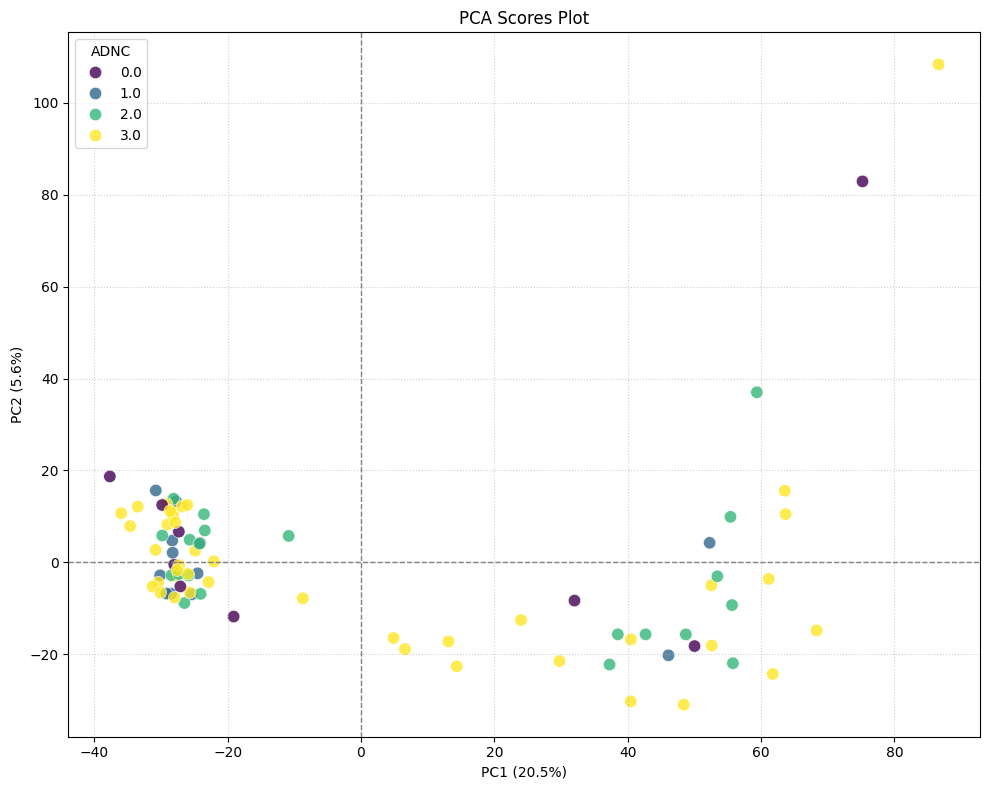

In [ ]:
print("PCA Scores Plot")
plot_pca_scores(pca_df, explained_variance_ratio, color_by=data['ADNC'])

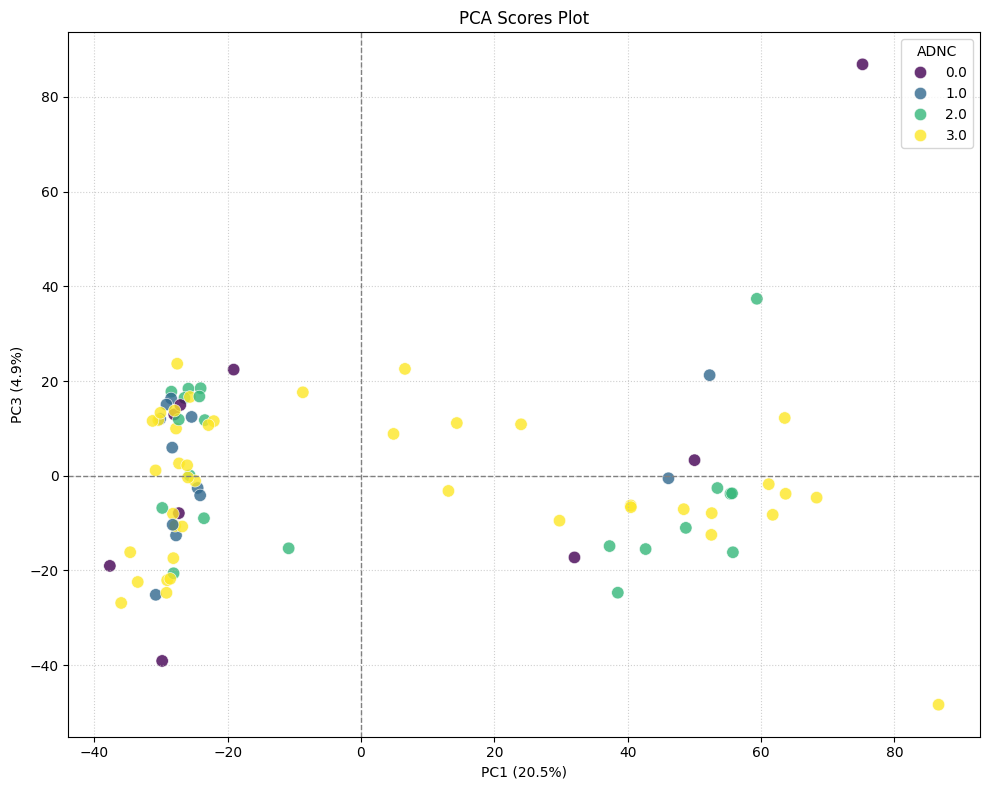

In [ ]:
plot_pca_scores(pca_df, explained_variance_ratio, component_x=1, component_y=3,  color_by=data['ADNC'])


In [ ]:
#Loadings per PC
loadings_df.head(10)

PC1       PC2       PC3       PC4       PC5  \
Age at Death               -0.000432  0.001048 -0.007874 -0.010671  0.008666   
Years of education         -0.006057  0.002287  0.007970 -0.003771 -0.010388   
PMI                         0.002501  0.008069 -0.000218 -0.010826  0.013075   
APOE Genotype              -0.001229  0.000498 -0.002345  0.005049  0.002093   
Thal                        0.001350 -0.006277 -0.007702  0.001734  0.000790   
Braak                       0.003580 -0.005492  0.005346 -0.007638 -0.003748   
CERAD                       0.001196 -0.000733 -0.003287 -0.003650  0.003493   
ADNC                        0.002014 -0.006028 -0.008059 -0.000591  0.000862   
percent 6e10 positive area -0.000174 -0.008136 -0.001499  0.003963 -0.000523   
percent AT8 positive area  -0.004763 -0.001713  0.001584  0.001443 -0.000083   

                                 PC6       PC7       PC8       PC9      PC10  \
Age at Death               -0.002428 -0.001044 -0.012089 -0.003709  0.006493   
Years of education         -0.002262  0.002861  0.003652 -0.009260 -0.014862   
PMI                         0.015496 -0.004395 -0.000047 -0.001013  0.000483   
APOE Genotype               0.002063 -0.005668  0.006707  0.003687  0.002207   
Thal                        0.014230 -0.012541  0.009507 -0.018244  0.010690   
Braak                       0.005489 -0.015356  0.010577 -0.020109  0.003519   
CERAD                       0.016297 -0.010290  0.006932 -0.011880  0.006997   
ADNC                        0.016269 -0.013819  0.012031 -0.015257  0.009209   
percent 6e10 positive area  0.010257 -0.015293  0.005251 -0.006753  0.006346   
percent AT8 positive area   0.003361 -0.014830  0.006197 -0.006181  0.009051   

                            ...      PC75      PC76      PC77      PC78  \
Age at Death                ... -0.022830 -0.028393 -0.074629  0.003065   
Years of education          ... -0.067529  0.016664  0.117398 -0.030364   
PMI                         ...  0.014076 -0.001970  0.024112 -0.017064   
APOE Genotype               ... -0.030456  0.111219  0.024743  0.032234   
Thal                        ... -0.025216 -0.009656  0.027944  0.021635   
Braak                       ... -0.035966 -0.036193  0.029277  0.048416   
CERAD                       ... -0.050879 -0.055162  0.061096  0.083742   
ADNC                        ... -0.035930 -0.015212  0.071869  0.045433   
percent 6e10 positive area  ...  0.023193  0.042693  0.022785 -0.006996   
percent AT8 positive area   ... -0.028449  0.031451  0.082618  0.045152   

                                PC79      PC80      PC81      PC82      PC83  \
Age at Death               -0.031571 -0.006000  0.045456  0.045909 -0.086084   
Years of education         -0.002091  0.059521 -0.009506  0.080747  0.058420   
PMI                        -0.015660 -0.005490  0.099739 -0.011584  0.120188   
APOE Genotype               0.033677 -0.069366 -0.030847  0.021294  0.049348   
Thal                        0.008539 -0.055401  0.042248  0.014973  0.035002   
Braak                       0.005324 -0.082660  0.100140  0.024527 -0.033603   
CERAD                       0.066337  0.012798  0.049254 -0.006736 -0.010591   
ADNC                        0.042261 -0.052981  0.025890  0.015514 -0.002462   
percent 6e10 positive area -0.004350 -0.013673  0.115862 -0.026917  0.022458   
percent AT8 positive area  -0.025327 -0.066990  0.001548  0.034391 -0.019041   

                                PC84  
Age at Death                0.219776  
Years of education         -0.208037  
PMI                         0.061871  
APOE Genotype               0.085807  
Thal                        0.170658  
Braak                      -0.037846  
CERAD                       0.220620  
ADNC                       -0.039006  
percent 6e10 positive area -0.122455  
percent AT8 positive area  -0.113126  

[10 rows x 84 columns]

In [ ]:
#Variable Loadings plot

def plot_pca_loadings(loadings_df: pd.DataFrame, explained_variance_ratio: np.array, top_variables: dict,
                      component_x: int = 1, component_y: int = 2, title: str = "PCA Loadings Plot"):
    """
    Generates a graph of the loadings of the variables in the PCA space.

    Args:
        loadings_df (pd.DataFrame): DataFrame with the loadings of each variable.
        explained_variance_ratio (np.array): Variance explained by each PC.
        top_variables (dict): Dictionary with the N most influential variables per PC.
        component_x (int): The number of the PC for the X axis.
        component_y (int): The number of the PC for the Y axis.
        title (str): Title of the graph.
    """
    pc_x_label = f'PC{component_x}'
    pc_y_label = f'PC{component_y}'

    if pc_x_label not in loadings_df.columns or pc_y_label not in loadings_df.columns:
        raise ValueError(f"Components {pc_x_label} and/or {pc_y_label} not available in loadings.")

    plt.figure(figsize=(10, 8))

    #Draw all loadings as background dots
    sns.scatterplot(x=loadings_df[pc_x_label], y=loadings_df[pc_y_label],
                    color='lightgrey', alpha=0.5, s=50, edgecolor='none')

    #Identify the main variables of both components to highlight them.
    all_top_vars = []
    if pc_x_label in top_variables:
        all_top_vars.extend(top_variables[pc_x_label])
    if pc_y_label in top_variables:
        all_top_vars.extend(top_variables[pc_y_label])

    unique_top_vars = list(set(all_top_vars))

    #Draw arrows only for the most influential variables
    for var in unique_top_vars:
        x = loadings_df.loc[var, pc_x_label]
        y = loadings_df.loc[var, pc_y_label]

        plt.arrow(0, 0, x, y, color='red', alpha=0.8, head_width=0.002, lw=0.1)
        plt.text(x * 1.05, y * 1.05, var, color='black', ha='center', va='center', fontsize=9, fontweight='bold')

    plt.title(title)
    plt.xlabel(f'{pc_x_label} ({explained_variance_ratio[component_x-1]:.1%})')
    plt.ylabel(f'{pc_y_label} ({explained_variance_ratio[component_y-1]:.1%})')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.axhline(0, color='grey', lw=1, linestyle='--')
    plt.axvline(0, color='grey', lw=1, linestyle='--')
    plt.tight_layout()
    plt.show()

PCA Loadings Plot


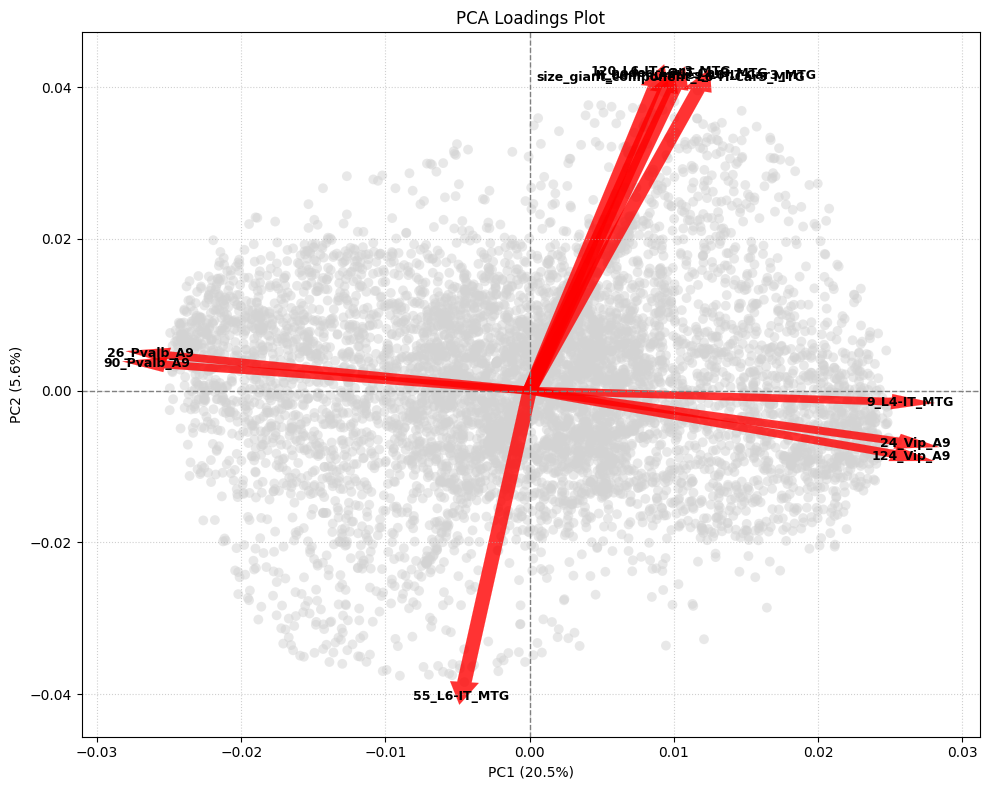

In [ ]:
print("PCA Loadings Plot")
plot_pca_loadings(loadings_df, explained_variance_ratio, top_variables)

In [ ]:
#Combined Scores and Loadings Chart

def plot_biplot(pca_df: pd.DataFrame, loadings_df: pd.DataFrame, explained_variance_ratio: np.array, top_variables: dict,
                component_x: int = 1, component_y: int = 2,
                color_by: pd.Series = None, title: str = "PCA Biplot"):
    """
    Generates a Biplot, combining the sample points and the loadings vectors.

    Args:
        pca_df (pd.DataFrame): DataFrame with the transformed data (scores).
        loadings_df (pd.DataFrame): DataFrame with the loadings for each variable.
        explained_variance_ratio (np.array): Variance explained by each PC.
        top_variables (dict): Dictionary with the N most influential variables per PC.
        component_x (int): The number of the PC for the X axis.
        component_y (int): The number of the PC for the Y axis.
        colour_by (pd.Series, optional): A Pandas series with a categorical variable to colour the points.
        title (str): Title of the graph.
    """
    pc_x_label = f'PC{component_x}'
    pc_y_label = f'PC{component_y}'

    if pc_x_label not in pca_df.columns or pc_y_label not in pca_df.columns:
        raise ValueError(f"Components {pc_x_label} and/or {pc_y_label} not available in pca dataframe.")
    if pc_x_label not in loadings_df.columns or pc_y_label not in loadings_df.columns:
        raise ValueError(f"Components {pc_x_label} and/or {pc_y_label} not available in pca loadings.")

    plt.figure(figsize=(12, 10))

    #Score chart
    if color_by is not None and len(color_by) == len(pca_df):
        sns.scatterplot(x=pca_df[pc_x_label], y=pca_df[pc_y_label],
                        hue=color_by,
                        s=80, alpha=0.7, edgecolor='w', linewidth=0.5,
                        palette='viridis')
    else:
        sns.scatterplot(x=pca_df[pc_x_label], y=pca_df[pc_y_label],
                        s=80, alpha=0.7, edgecolor='w', linewidth=0.5,
                        color='skyblue')

    #To overlay the loadings, we need a different scale if the loadings are very small.
    #Normalise so that the loadings fit on the same graph as the scores.
    x_max = pca_df[pc_x_label].abs().max()
    y_max = pca_df[pc_y_label].abs().max()
    load_max_x = loadings_df[pc_x_label].abs().max()
    load_max_y = loadings_df[pc_y_label].abs().max()

    #Scale factor for the loadings
    scale_factor_x = x_max / load_max_x if load_max_x > 0 else 1
    scale_factor_y = y_max / load_max_y if load_max_y > 0 else 1

    #Choose the smallest factor to ensure that everything fits without overflowing.
    scale_factor = min(scale_factor_x, scale_factor_y) * 0.7 # Un poco de margen

    #Loadings graph (vectors of the most influential variables)
    all_top_vars = []
    if pc_x_label in top_variables:
        all_top_vars.extend(top_variables[pc_x_label])
    if pc_y_label in top_variables:
        all_top_vars.extend(top_variables[pc_y_label])

    unique_top_vars = list(set(all_top_vars))

    for var in unique_top_vars:
        x_load = loadings_df.loc[var, pc_x_label] * scale_factor
        y_load = loadings_df.loc[var, pc_y_label] * scale_factor

        plt.arrow(0, 0, x_load, y_load, color='red', alpha=0.9, head_width=x_max * 0.02, lw=1.5)
        plt.text(x_load * 1.05, y_load * 1.05, var, color='darkred', ha='center', va='center', fontsize=9, fontweight='bold')

    plt.title(title)
    plt.xlabel(f'{pc_x_label} ({explained_variance_ratio[component_x-1]:.1%})')
    plt.ylabel(f'{pc_y_label} ({explained_variance_ratio[component_y-1]:.1%})')
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.axhline(0, color='grey', lw=1, linestyle='--')
    plt.axvline(0, color='grey', lw=1, linestyle='--')
    plt.tight_layout()
    plt.show()

PCA Biplot PC1 and PC2


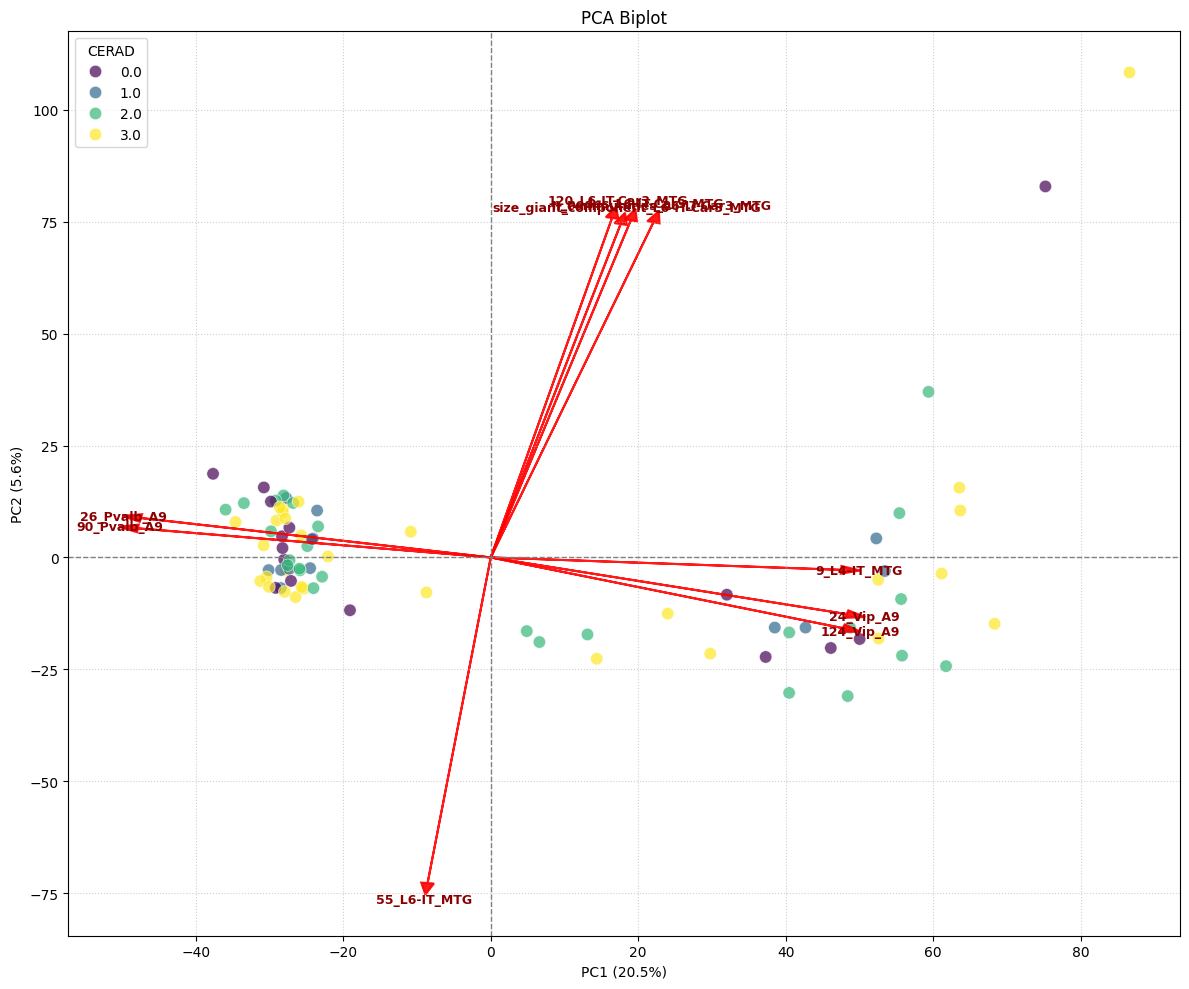

In [ ]:
print("PCA Biplot PC1 and PC2")
plot_biplot(pca_df, loadings_df, explained_variance_ratio, top_variables, color_by=data['CERAD'])


PCA Biplot PC1 and PC3


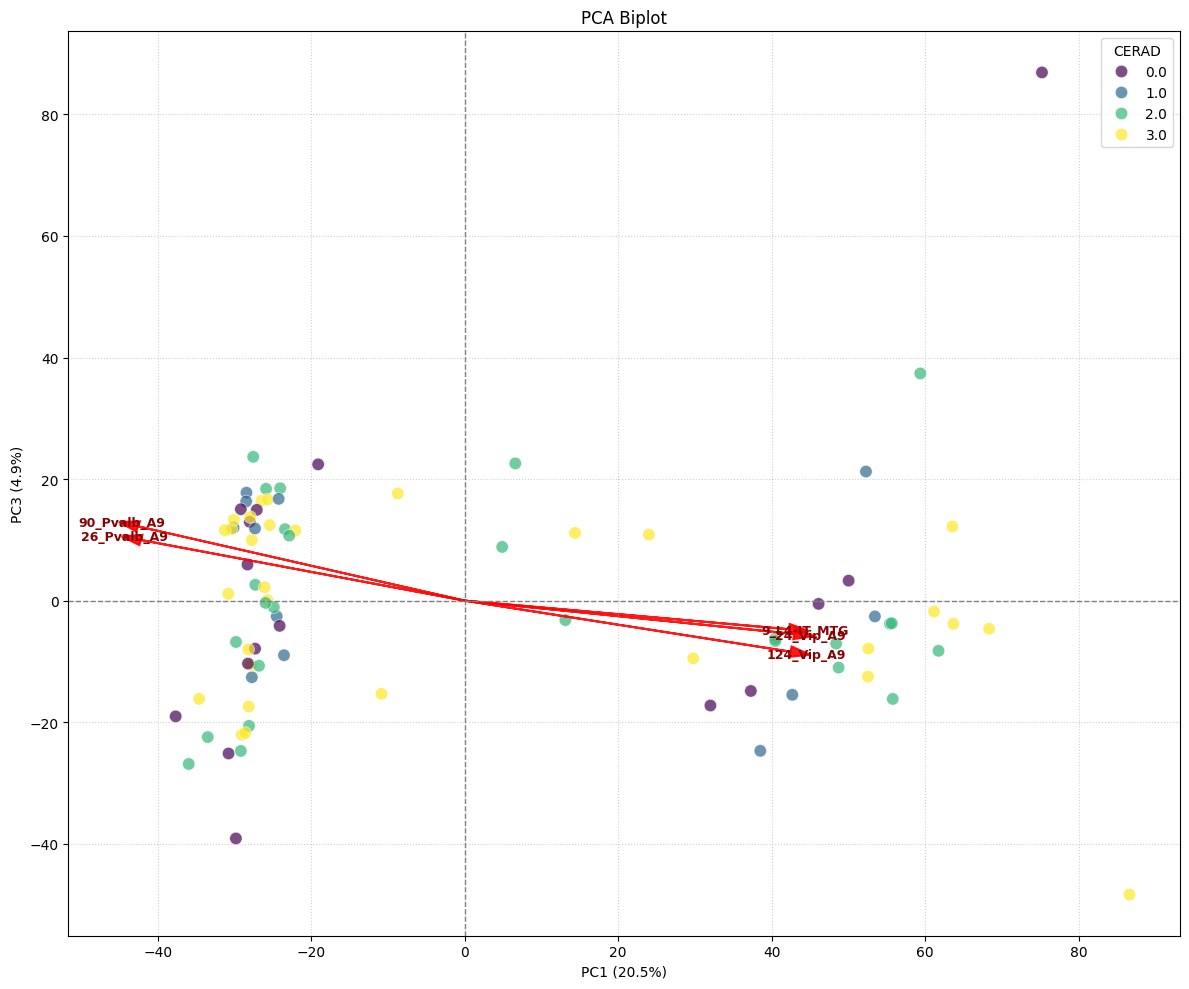

In [ ]:
print("PCA Biplot PC1 and PC3")
plot_biplot(pca_df, loadings_df, explained_variance_ratio, top_variables,
            component_x=1, component_y=3, color_by=data['CERAD'])

In [ ]:
#Top variables that explain the variance per PC
top_variables_pca.keys()

dict_keys(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20', 'PC21', 'PC22', 'PC23', 'PC24', 'PC25', 'PC26', 'PC27', 'PC28', 'PC29', 'PC30', 'PC31', 'PC32', 'PC33', 'PC34', 'PC35', 'PC36', 'PC37', 'PC38', 'PC39', 'PC40', 'PC41', 'PC42', 'PC43', 'PC44', 'PC45', 'PC46', 'PC47', 'PC48', 'PC49', 'PC50', 'PC51', 'PC52', 'PC53', 'PC54', 'PC55', 'PC56', 'PC57', 'PC58', 'PC59', 'PC60', 'PC61', 'PC62', 'PC63', 'PC64', 'PC65', 'PC66', 'PC67', 'PC68', 'PC69', 'PC70', 'PC71', 'PC72', 'PC73', 'PC74', 'PC75', 'PC76', 'PC77', 'PC78', 'PC79', 'PC80', 'PC81', 'PC82', 'PC83', 'PC84'])

In [ ]:
#just to check if we have the number of variables per PC as indicated
len(top_variables_pca['PC2'])

50

In [ ]:
#The proportion of the dataset's variance that each principal component accounts for
explained_variance_ratio

array([2.04683041e-01, 5.56325196e-02, 4.88327463e-02, 3.89803820e-02,
       3.31611103e-02, 3.19667942e-02, 2.91901437e-02, 2.74042046e-02,
       2.38550066e-02, 2.24842007e-02, 2.17905212e-02, 2.10258559e-02,
       2.04803873e-02, 1.93074312e-02, 1.78427293e-02, 1.70324581e-02,
       1.59421559e-02, 1.55918925e-02, 1.49736711e-02, 1.42645241e-02,
       1.35518828e-02, 1.32148251e-02, 1.25019500e-02, 1.18930520e-02,
       1.15790591e-02, 1.12014842e-02, 1.08383044e-02, 1.00726989e-02,
       9.81939401e-03, 9.38157667e-03, 9.21731418e-03, 8.85113041e-03,
       8.71911763e-03, 8.48829778e-03, 8.24352733e-03, 8.02404263e-03,
       7.51698485e-03, 7.37562156e-03, 6.73212972e-03, 6.67175701e-03,
       6.58174687e-03, 6.21852867e-03, 5.92013579e-03, 5.55623314e-03,
       5.27491710e-03, 5.06255985e-03, 4.94700291e-03, 4.63366264e-03,
       4.24205691e-03, 4.12562016e-03, 4.07440219e-03, 3.68747465e-03,
       3.49428093e-03, 3.48472544e-03, 3.37455627e-03, 3.16522769e-03,
      

In [ ]:
cumulative_variance

array([0.20468304, 0.26031556, 0.30914831, 0.34812869, 0.3812898 ,
       0.41325659, 0.44244674, 0.46985094, 0.49370595, 0.51619015,
       0.53798067, 0.55900653, 0.57948691, 0.59879434, 0.61663707,
       0.63366953, 0.64961169, 0.66520358, 0.68017725, 0.69444178,
       0.70799366, 0.72120848, 0.73371043, 0.74560349, 0.75718254,
       0.76838403, 0.77922233, 0.78929503, 0.79911443, 0.808496  ,
       0.81771332, 0.82656445, 0.83528357, 0.84377186, 0.85201539,
       0.86003943, 0.86755642, 0.87493204, 0.88166417, 0.88833593,
       0.89491767, 0.9011362 , 0.90705634, 0.91261257, 0.91788749,
       0.92295005, 0.92789705, 0.93253071, 0.93677277, 0.94089839,
       0.94497279, 0.94866027, 0.95215455, 0.95563927, 0.95901383,
       0.96217906, 0.9650172 , 0.96752267, 0.9699041 , 0.97219317,
       0.97438179, 0.97634612, 0.97825083, 0.98008763, 0.98184927,
       0.98348086, 0.98503501, 0.98648364, 0.98790247, 0.98920057,
       0.99037738, 0.99147504, 0.9925056 , 0.9934911 , 0.99441

In [ ]:
#Explained Variance Plot (Scree Plot)

def plot_scree(explained_variance_ratio: np.array, cumulative_variance: np.array, title: str = "Scree Plot"):
    """
    Generates a Scree Plot showing the individual and cumulative explained variance for each PC.

    Args:
        explained_variance_ratio (np.array): Variance explained by each PC.
        cumulative_variance (np.array): Cumulative variance.
        title (str): Graph title.
    """
    n_components = len(explained_variance_ratio)

    plt.figure(figsize=(15, 6))

    plt.bar(range(1, n_components + 1), explained_variance_ratio, alpha=0.6, align='center',
            label='Individual explained variance', color='skyblue')

    plt.step(range(1, n_components + 1), cumulative_variance, where='mid',
             label='Cumulative explained variance', color='red', linestyle='--', marker='o')

    plt.ylabel('Proportion of Explained Variance')
    plt.xlabel('Principal Component')
    plt.title(title)
    plt.xticks(range(1, n_components + 1))
    plt.ylim(0, 1) #Always from 0 to 1
    plt.legend(loc='best')
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.tight_layout()
    plt.show()

Scree Plot


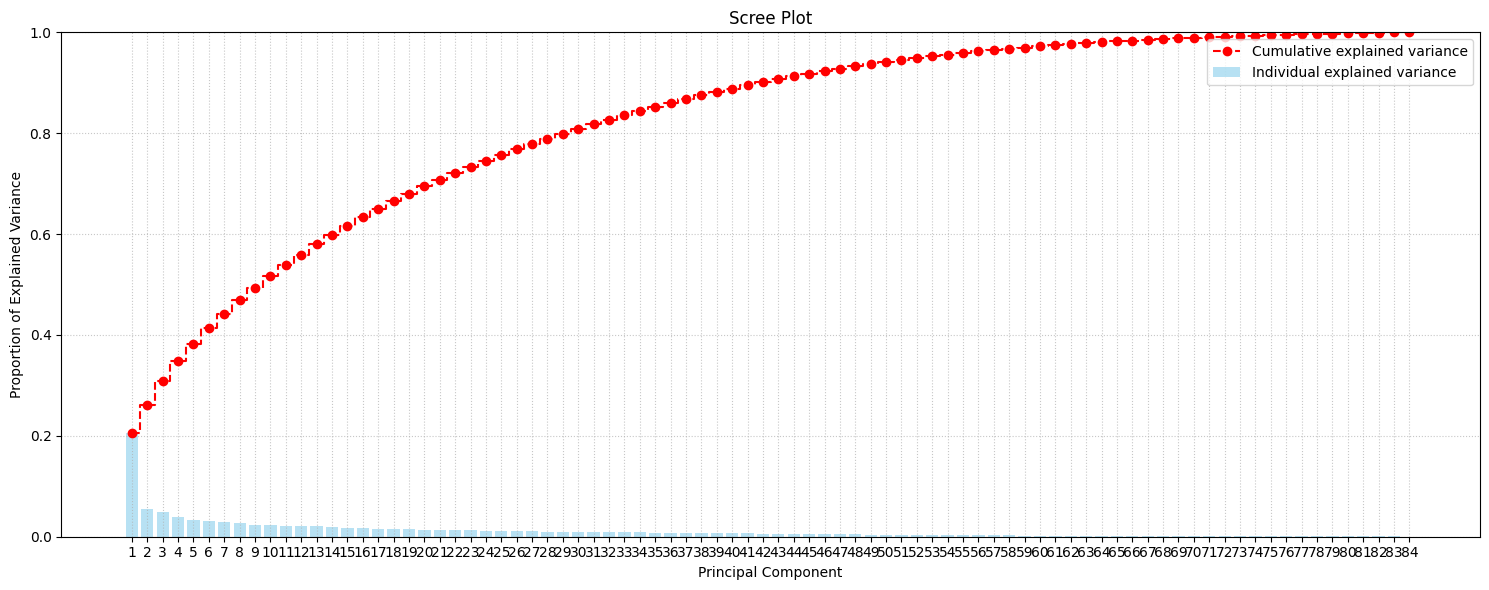

In [ ]:
print("Scree Plot")
plot_scree(explained_variance_ratio, cumulative_variance)

## Variables chosen by PCA are

In [ ]:
#Based on the Scree Plot decided to keep the first 20 components.
components = 20

#Compile the lists of the N principal components.
list_of_lists = [top_variables_pca[f'PC{i+1}'] for i in range(components)]

#Select the features, drop duplicates with set and order
selected_features_vector = sorted(list(set(sum(list_of_lists, []))))
print(selected_features_vector[:20]) #Only first 20

['0_Chandelier_A9', '0_Endothelial_A9', '0_Endothelial_MTG', '0_L6b_A9', '0_Lamp5-Lhx6_A9', '0_Pvalb_A9', '0_Sncg_MTG', '0_VLMC_A9', '100_Chandelier_A9', '100_L5-ET_A9', '100_L6b_A9', '100_Lamp5_A9', '100_Pax6_MTG', '100_Sncg_A9', '100_Sncg_MTG', '101_Chandelier_A9', '101_Chandelier_MTG', '101_Endothelial_A9', '101_Endothelial_MTG', '101_L6-CT_MTG']


# 7. Voting matrix

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

def voting_matrix(filters_dict: dict, min_votes: int = 2):
    """
    Generates a voting matrix of variables filtered by different functions,
    and returns the list of winning variables.

    Args:
        filters_dict (dict): Dictionary {filter_name: list_of_variables}.
        min_votes (int): Minimum number of votes to consider a variable a winner.

    Returns:
        vote_df (pd.DataFrame): Binary voting matrix (variables x filters + votes).
        winners (list): List of variables with at least `min_votes` votes.
    """
    #List of lists first!
    filter_names = list(filters_dict.keys())
    filter_vars = list(filters_dict.values())

    #Use MultiLabelBinarizer
    mlb = MultiLabelBinarizer()
    binary_matrix = mlb.fit_transform(filter_vars)

    #Create binary DataFrame (is the variable in the given list?)
    vote_df = pd.DataFrame(binary_matrix.T, index=mlb.classes_, columns=filter_names)

    #Add column with total votes
    vote_df["votes"] = vote_df.sum(axis=1)

    #And the winners are...
    winners = vote_df[vote_df["votes"] >= min_votes].index.tolist()

    return vote_df.sort_values("votes", ascending=False), winners


In [ ]:
filters = {
    "completeness_vars": completeness_vars,
    "variance_vars": variance_vars,
    "linear_vars": linear_filter["final_features"],
    "non_linear_vars": features_information,
    "pca_vars": selected_features_vector
}

vote_matrix, winners = voting_matrix(filters, min_votes=3)


In [ ]:
display(vote_matrix)

completeness_vars  variance_vars  \
global_density_Oligodendrocyte_A9                    1              1   
27_L6-IT_A9                                          1              1   
10_Pvalb_A9                                          1              1   
11_L5-IT_MTG                                         1              1   
1_Sncg_A9                                            1              1   
...                                                ...            ...   
size_giant_component_L6-IT-Car3_MTG                  0              0   
size_giant_component_L5-IT_MTG                       1              0   
size_giant_component_L5-IT_A9                        1              0   
size_giant_component_L5-6-NP_MTG                     0              0   
size_giant_component_L5-6-NP_A9                      0              0   

                                     linear_vars  non_linear_vars  pca_vars  \
global_density_Oligodendrocyte_A9              1                1         1   
27_L6-IT_A9                                    1                1         1   
10_Pvalb_A9                                    1                1         1   
11_L5-IT_MTG                                   1                1         1   
1_Sncg_A9                                      1                1         1   
...                                          ...              ...       ...   
size_giant_component_L6-IT-Car3_MTG            0                0         1   
size_giant_component_L5-IT_MTG                 0                0         0   
size_giant_component_L5-IT_A9                  0                0         0   
size_giant_component_L5-6-NP_MTG               0                0         1   
size_giant_component_L5-6-NP_A9                0                0         1   

                                     votes  
global_density_Oligodendrocyte_A9        5  
27_L6-IT_A9                              5  
10_Pvalb_A9                              5  
11_L5-IT_MTG                             5  
1_Sncg_A9                                5  
...                                    ...  
size_giant_component_L6-IT-Car3_MTG      1  
size_giant_component_L5-IT_MTG           1  
size_giant_component_L5-IT_A9            1  
size_giant_component_L5-6-NP_MTG         1  
size_giant_component_L5-6-NP_A9          1  

[6577 rows x 6 columns]

In [ ]:
print("\nWinner variables:", winners)



Winner variables: ['0_Astrocyte_A9', '0_Astrocyte_MTG', '0_Chandelier_A9', '0_Chandelier_MTG', '0_Endothelial_A9', '0_Endothelial_MTG', '0_L4-IT_A9', '0_L5-6-NP_A9', '0_L5-ET_MTG', '0_L6-IT-Car3_MTG', '0_L6b_A9', '0_L6b_MTG', '0_Lamp5-Lhx6_A9', '0_Microglia-PVM_A9', '0_Microglia-PVM_MTG', '0_OPC_MTG', '0_Oligodendrocyte_MTG', '0_Pax6_A9', '0_Sncg_MTG', '0_Sst-Chodl_A9', '0_Sst-Chodl_MTG', '0_VLMC_A9', '0_Vip_A9', '100_Astrocyte_MTG', '100_L2-3-IT_A9', '100_L4-IT_MTG', '100_L5-ET_A9', '100_L5-IT_A9', '100_L6-CT_A9', '100_L6-IT-Car3_MTG', '100_L6-IT_A9', '100_L6b_A9', '100_L6b_MTG', '100_Lamp5_A9', '100_OPC_MTG', '100_Oligodendrocyte_A9', '100_Pax6_MTG', '100_Pvalb_A9', '100_Sncg_A9', '100_Sst_A9', '100_Sst_MTG', '101_Astrocyte_A9', '101_Chandelier_A9', '101_Endothelial_A9', '101_Endothelial_MTG', '101_L2-3-IT_A9', '101_L2-3-IT_MTG', '101_L6-CT_A9', '101_L6-CT_MTG', '101_L6-IT-Car3_A9', '101_L6b_A9', '101_L6b_MTG', '101_Lamp5_MTG', '101_Microglia-PVM_A9', '101_OPC_A9', '101_Oligodendroc

In [ ]:
print(len(winners))

2043


## Final filter

In [ ]:
def filter_dataframe(df: pd.DataFrame, winners: list):
    """
    Filters a DataFrame to keep the selected variables and all non-numeric columns.

    Args:
        df (pd.DataFrame): The original, complete DataFrame.
        winners (list): A list of strings with the names of the selected numeric columns.

    Returns:
        pd.DataFrame: A new DataFrame containing only the “winners” columns and the non-numeric columns.
    """
    #Get non numeric cols
    non_numeric_cols = df.select_dtypes(exclude=np.number).columns.tolist()

    #Combine the list of winners with the non-numeric columns.
    #Set varsto ensure there are no duplicates
    final_cols_to_keep = non_numeric_cols + [w for w in winners if w not in non_numeric_cols]
    #Filter DataFrame, use .copy()
    filtered_df = df[final_cols_to_keep].copy()

    return filtered_df, final_cols_to_keep, non_numeric_cols

In [ ]:
final_data, final_cols_to_keep, non_numeric_cols = filter_dataframe(df=data, winners=winners)

In [ ]:
non_numeric_cols

['Donor ID']

In [ ]:
final_data.shape

(84, 2044)

In [ ]:
final_cols_to_keep[0:10]

['Donor ID',
 '0_Astrocyte_A9',
 '0_Astrocyte_MTG',
 '0_Chandelier_A9',
 '0_Chandelier_MTG',
 '0_Endothelial_A9',
 '0_Endothelial_MTG',
 '0_L4-IT_A9',
 '0_L5-6-NP_A9',
 '0_L5-ET_MTG']

In [ ]:
final_data.head(10)

Donor ID  0_Astrocyte_A9  0_Astrocyte_MTG  0_Chandelier_A9  \
0  H20-33-034        0.322818         0.442691         0.054855   
1  H21-33-035        0.483610         0.627529         0.058222   
2  H20-33-014        0.481466         0.756656         0.068032   
3  H21-33-015        0.526468         0.662297         0.048793   
4  H20-33-033       -0.087029         0.713630         0.069679   
5  H21-33-043        0.466745         0.646856        -0.010470   
6  H21-33-005        0.534883         0.650285         0.033606   
7  H20-33-031        0.584966         0.275150         0.027361   
8  H21-33-036        0.534301         0.647350         0.060550   
9  H21-33-002        0.497413         0.649080         0.061282   

   0_Chandelier_MTG  0_Endothelial_A9  0_Endothelial_MTG  0_L4-IT_A9  \
0         -0.078272          0.206830           0.206830    0.232296   
1         -0.074747          0.166365           0.114813    0.445008   
2         -0.102740          0.232929           0.166365    0.332156   
3         -0.087140          0.089667           0.078592    0.450923   
4         -0.078004          0.234594           0.273744    0.285086   
5         -0.101791          0.157323           0.122155    0.433075   
6         -0.043296          0.319234           0.355398    0.316598   
7         -0.053383          0.283864           0.280986    0.311234   
8         -0.040270          0.122155           0.108196    0.382435   
9         -0.093388          0.355398           0.320338    0.413048   

   0_L5-6-NP_A9  0_L5-ET_MTG  ...  n_communities_Vip_A9  \
0      0.113359     0.152004  ...                3568.0   
1     -0.006220     0.116011  ...                1374.0   
2      0.091794     0.229157  ...                1505.0   
3      0.072737     0.097965  ...                2737.0   
4      0.109904     0.108196  ...                2327.0   
5      0.025758     0.372487  ...                1194.0   
6      0.047531     0.157323  ...                1065.0   
7      0.049210     0.280986  ...                 816.0   
8      0.088639     0.425497  ...                 982.0   
9      0.046636     0.320338  ...                4331.0   

   n_components_L4-IT_MTG  n_components_L5-IT_A9  n_components_L5-IT_MTG  \
0                   501.0                  242.0                  1354.0   
1                  1582.0                 1390.0                  1541.0   
2                  1074.0                  561.0                    95.0   
3                   541.0                 1527.0                  1509.0   
4                   151.0                  259.0                     1.0   
5                  1911.0                 1449.0                  1473.0   
6                   372.0                  819.0                   272.0   
7                  1848.0                 1616.0                  1434.0   
8                  1013.0                 1525.0                  1637.0   
9                  1946.0                    1.0                   315.0   

   n_components_Lamp5_A9  n_components_Pvalb_A9  n_nodes_Astrocyte_A9  \
0                  294.0                 1749.0                  88.0   
1                  192.0                 1504.0                9392.0   
2                  157.0                  318.0                  14.0   
3                  190.0                 1149.0               18385.0   
4                  205.0                 1654.0                2941.0   
5                  376.0                 1819.0                 389.0   
6                  119.0                  210.0                 577.0   
7                   48.0                 1751.0                8757.0   
8                  263.0                 1793.0                   0.0   
9                  148.0                   10.0                  33.0   

   n_nodes_L4-IT_A9  perc_targeted_50_Oligodendrocyte_MTG  \
0            3091.0                                  0.14   
1           14601.0                                  0.06   


# THE END